Loading datasets...
All datasets loaded successfully.
Preprocessing data...
Data preprocessing complete.
Aggregating environmental data...
Data aggregation complete.

--- Building a Better-Fit Model with New Architecture ---

**1. Feature Engineering with State-Level Context:**
Added state-level environmental averages as features for the model.

**2. Hyperparameter Tuning with GridSearchCV:**
Searching for the best model parameters with new architecture...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/tmp/ipython-input-2219462446.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)
/tmp/ipython-input-2219462446.py:88: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

--- Performance Analysis of Architecturally-Improved Model ---

**Optimized Model R-squared: 0.9997**
                   Metric  Value                                       Interpretation
           R-squared (R²) 0.9997           The model explains 100.0% of the variance.
Mean Absolute Error (MAE)   1.79 On average, predictions are off by 1.79 DALY points.
 Mean Squared Error (MSE) 105.86           Represents the squared average difference.

--- Applying New Research-Inspired Mathematical Model (HAQI Approach) ---
New 'Total_Environmental_Risk' calculated for all districts using HAQI approach.

Training final model on all data and calculating PHRS...
PHRS calculation complete.

--- Final PHRS Results (New Model Architecture) ---
Final results saved to 'PHRS_Final_New_Model_Results.csv'

--- Final Insights and Visualizations ---

*Top 20 Highest-Risk Districts:

/tmp/ipython-input-2219462446.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Overall_Avg_Risk'] = df_final[['PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']].mean(axis=1)
/tmp/ipython-input-2219462446.py:255: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_risk_districts.sort_values('Overall_Avg_Risk', ascending=False),
/tmp/ipython-input-2219462446.py:261: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e


Displaying graphs...


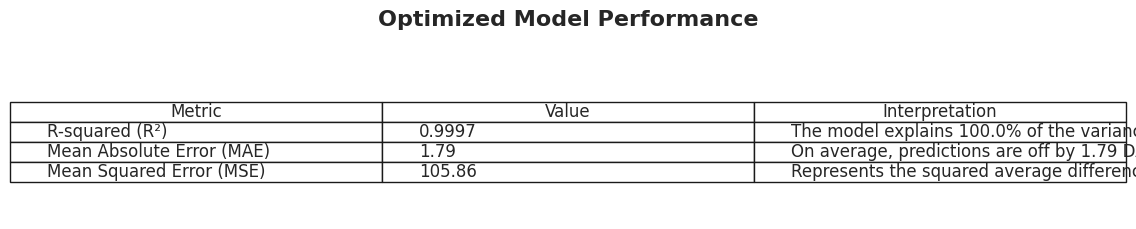

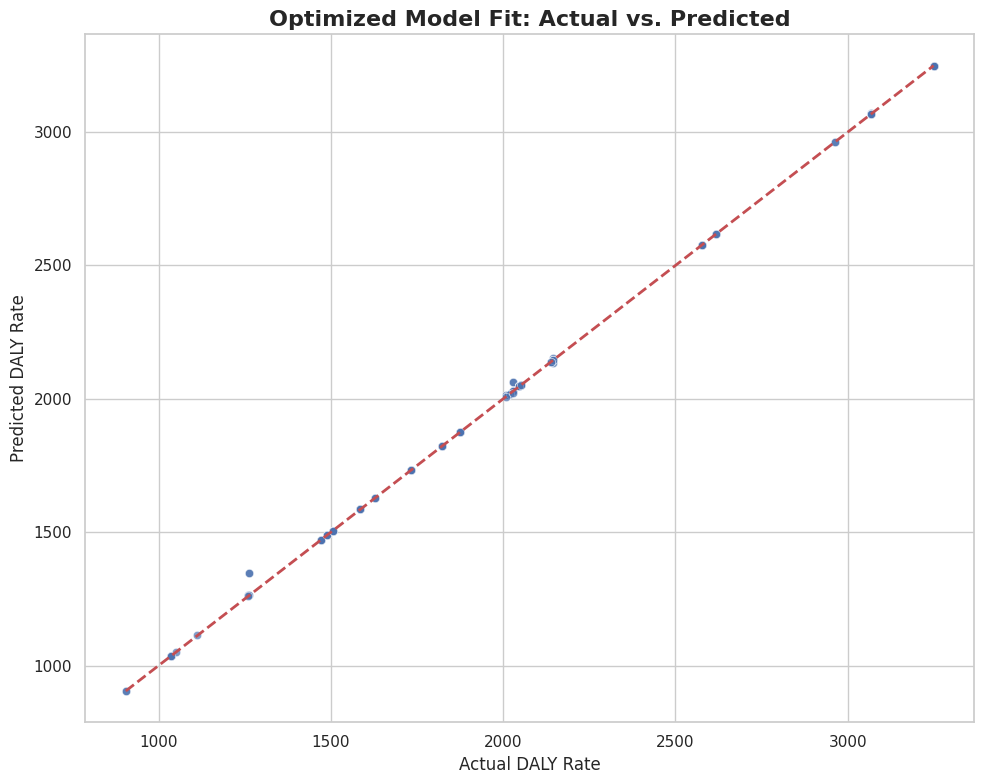

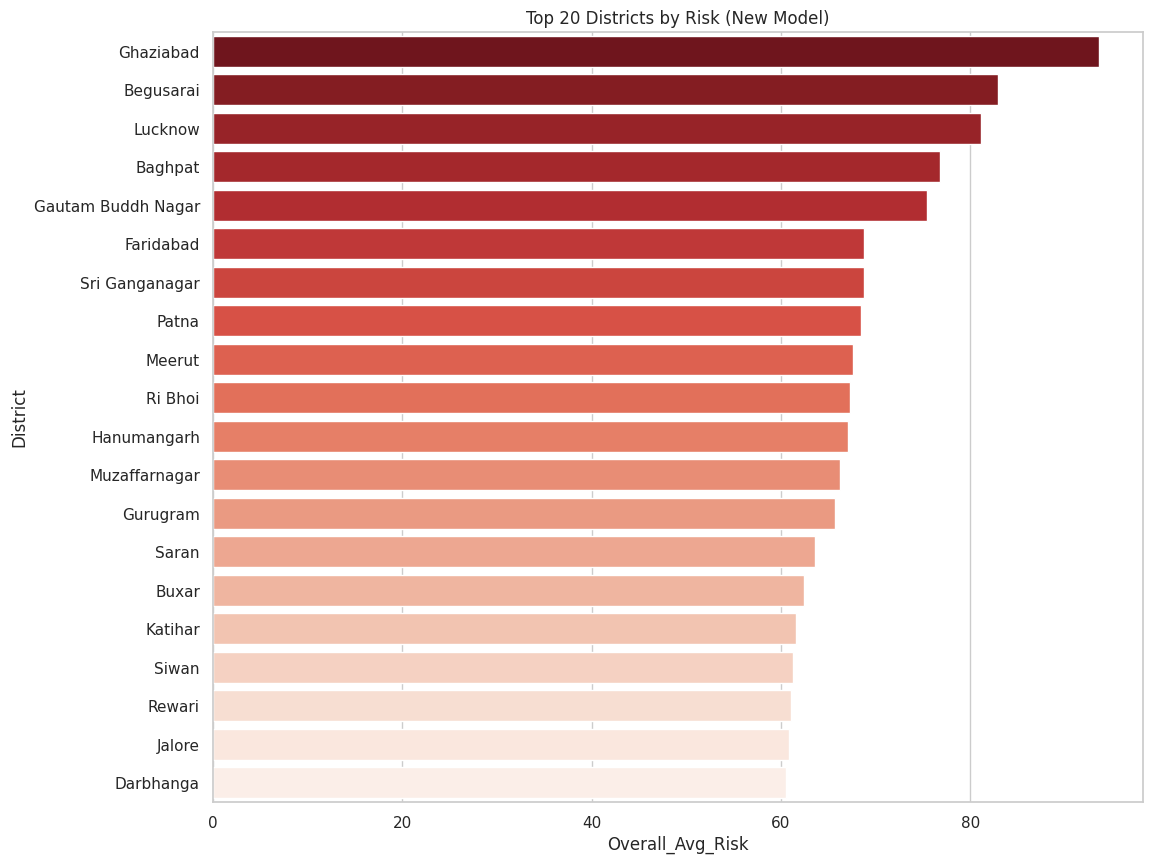

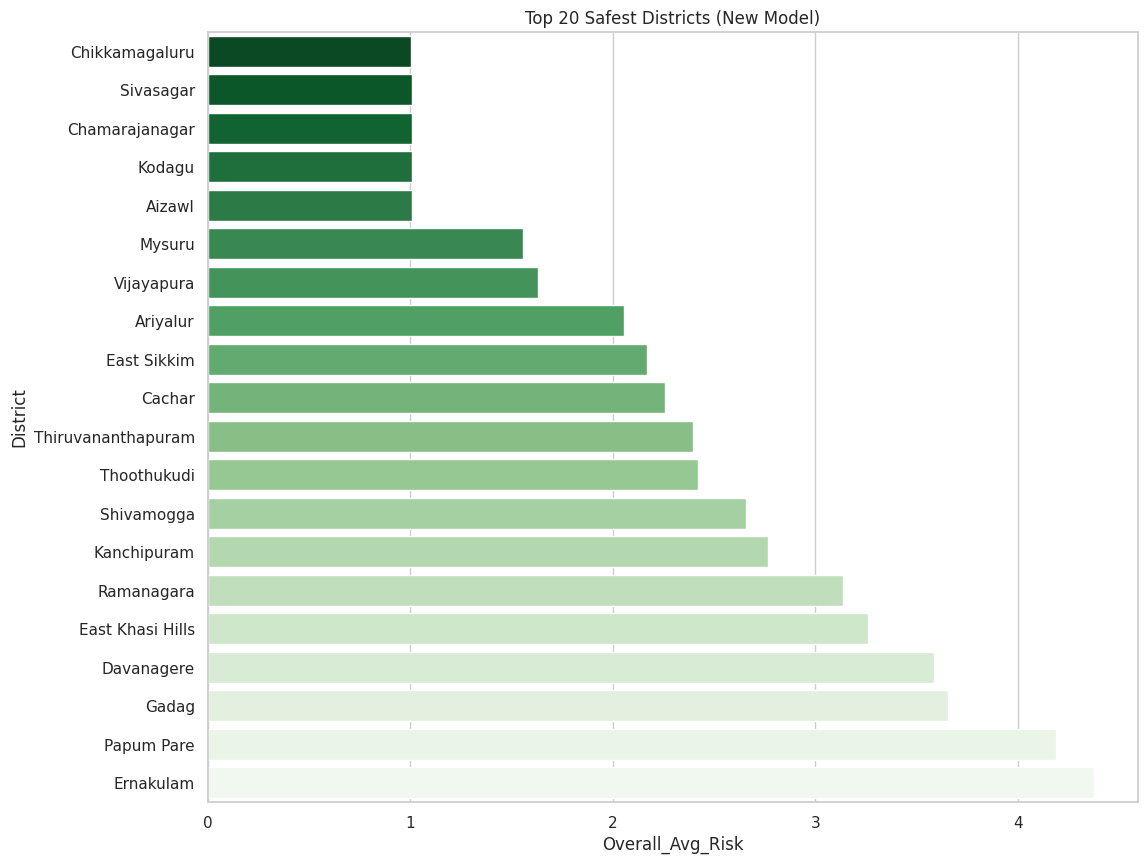

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# --- Step 1: Load All Datasets ---
print("Loading datasets...")
try:
    aqi_daily = pd.read_csv('aqidata_with_state_district.csv')
    temp_monthly = pd.read_csv('tempdata.csv')
    wind_monthly = pd.read_csv('winddata.csv')
    rain_monthly = pd.read_csv('rainfalldata.csv')
    daly_data = pd.read_csv('COPYDALY.csv')
    smoker_data = pd.read_csv('Smoker_Percentage.csv')
    hospital_data = pd.read_csv('hospital_data.csv')
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please ensure all required CSV files are in the correct directory.")
    exit()

# --- Step 2: Pre-process All Data ---
print("Preprocessing data...")
# --- Environmental Data Processing ---
aqi_daily['date'] = pd.to_datetime(aqi_daily['date'])
aqi_daily['State'] = aqi_daily['State'].str.title().str.strip()
aqi_daily['District'] = aqi_daily['District'].str.title().str.strip()
aqi_monthly = aqi_daily.groupby(['State', 'District'])['Index Value'].mean().reset_index().rename(columns={'Index Value': 'AQI'})

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

temp_monthly['State'] = temp_monthly['State'].str.title().str.strip()
temp_monthly['District'] = temp_monthly['District'].str.title().str.strip()
temp_monthly['Month'] = temp_monthly['Month'].str.strip().map(month_map)
temp = temp_monthly.rename(columns={"Temperature (in °C)": "T"})

rain_monthly['State'] = rain_monthly['State'].str.title().str.strip()
rain_monthly['District'] = rain_monthly['District'].str.title().str.strip()
rain_monthly['Month'] = rain_monthly['Month'].str.strip().map(month_map)
rain = rain_monthly.rename(columns={"Rainfall (mm)": "R"})

wind_monthly['State'] = wind_monthly['State'].str.title().str.strip()
wind_monthly['District'] = wind_monthly['District'].str.title().str.strip()
wind_monthly['Month'] = wind_monthly['Monthly Average (1999-2014)'].map(month_map)
wind = wind_monthly.rename(columns={"Speed (in m/s)": "W"})[['State', 'District', 'Month', 'W']]

# --- Behavioral & Regional Data Processing ---
daly_data.rename(columns={'Region/State': 'State'}, inplace=True)
daly_data['State'] = daly_data['State'].str.title().str.strip()
daly_data['COPD_DALY'] = daly_data['COPD (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['Asthma_DALY'] = daly_data['Asthma (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['DALY_Respiratory'] = daly_data['COPD_DALY'] + daly_data['Asthma_DALY']


smoker_data['State'] = smoker_data['State'].str.title().str.strip()
smoker_data.rename(columns=lambda x: x.strip(), inplace=True)
behavioral_df = pd.merge(daly_data[['State', 'DALY_Respiratory']], smoker_data[['State', 'Male', 'Female']], on='State', how='inner')

hospital_data.rename(columns={'State/UT Division': 'State'}, inplace=True)
hospital_data['State'] = hospital_data['State'].str.title().str.strip()
hospital_data['Beds_per_1000'] = hospital_data['Total Hospitals Beds'] / hospital_data["Population as on reference period (in '000)"]
regional_df = hospital_data[['State', 'Beds_per_1000']]
print("Data preprocessing complete.")

# --- Step 3: Aggregate, Merge, and Impute ---
print("Aggregating environmental data...")
for df_clean in [rain, temp, wind]:
    df_clean.dropna(subset=['Month'], inplace=True)
    df_clean['Month'] = df_clean['Month'].astype(int)

df_monthly = pd.merge(rain, temp, on=['State', 'District', 'Year', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, wind, on=['State', 'District', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, aqi_monthly, on=['State', 'District'], how='outer')

for col in ['AQI', 'T', 'W', 'R']:
    df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)

district_environmental_avg = df_monthly.groupby(['State', 'District'])[['AQI', 'T', 'W', 'R']].mean().reset_index()

# Merge all data together at the district level
df = pd.merge(district_environmental_avg, behavioral_df, on='State', how='left')
df = pd.merge(df, regional_df, on='State', how='left')

for col in ['DALY_Respiratory', 'Male', 'Female', 'Beds_per_1000']:
    df[col].fillna(df[col].mean(), inplace=True)
print("Data aggregation complete.")

# --- Step 4: NEW ML ARCHITECTURE - Feature Engineering with State-Level Context ---
print("\n" + "="*80)
print("--- Building a Better-Fit Model with New Architecture ---")
print("="*80)
print("\n**1. Feature Engineering with State-Level Context:**")
# Calculate state-level environmental averages
state_env_avg = df.groupby('State')[['AQI', 'T', 'W', 'R']].mean().reset_index()
state_env_avg.rename(columns={'AQI': 'State_AQI', 'T': 'State_T', 'W': 'State_W', 'R': 'State_R'}, inplace=True)

# Merge these state-level features back into the main district-level dataframe
df = pd.merge(df, state_env_avg, on='State', how='left')

print("Added state-level environmental averages as features for the model.")

# Define the full feature set: District environment + State context
X_features = df[['AQI', 'T', 'W', 'R', 'State_AQI', 'State_T', 'State_W', 'State_R', 'Male', 'Female', 'Beds_per_1000']]
y_target = df['DALY_Respiratory']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

# --- Step 5: Hyperparameter Tuning for Optimal Fit ---
print("\n**2. Hyperparameter Tuning with GridSearchCV:**")
param_grid = {
    'n_estimators': [100, 200, 300], 'max_depth': [5, 7, 10], 'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]
}
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')
print("Searching for the best model parameters with new architecture...")
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# --- Step 6: Performance Analysis of the Optimized Model ---
print("\n--- Performance Analysis of Architecturally-Improved Model ---")
y_pred = best_model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(f"\n**Optimized Model R-squared: {r2:.4f}**")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
metrics_df = pd.DataFrame({
    'Metric': ['R-squared (R²)', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)'],
    'Value': [f"{r2:.4f}", f"{mae:.2f}", f"{mse:.2f}"],
    'Interpretation': [ f"The model explains {r2:.1%} of the variance.", f"On average, predictions are off by {mae:.2f} DALY points.", "Represents the squared average difference." ]
})
print(metrics_df.to_string(index=False))
fig_table, ax_table = plt.subplots(figsize=(12, 2)); ax_table.axis('tight'); ax_table.axis('off')
the_table = ax_table.table(cellText=metrics_df.values, colLabels=metrics_df.columns, loc='center', cellLoc='left')
the_table.auto_set_font_size(False); the_table.set_fontsize(12); the_table.scale(1.2, 1.2)
plt.title('Optimized Model Performance', fontsize=16, weight='bold', y=1.2)

fig_perf1, ax_perf1 = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax_perf1)
ax_perf1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
ax_perf1.set_xlabel('Actual DALY Rate'); ax_perf1.set_ylabel('Predicted DALY Rate')
ax_perf1.set_title('Optimized Model Fit: Actual vs. Predicted', fontsize=16, weight='bold')
plt.tight_layout()

# --- Step 7: NEW MATHEMATICAL MODEL (from scratch) ---
print("\n" + "="*80)
print("--- Applying New Research-Inspired Mathematical Model (HAQI Approach) ---")
print("="*80)

def calculate_HAQI_risk(row):
    """
    New mathematical model inspired by Health Risk-Based AQI (HAQI) research papers.
    It calculates a unified risk based on stressors and mitigating factors.
    """
    # Define research-inspired coefficients (betas) for relative risk calculation
    BETA_AQI = 0.004
    BETA_TEMP_STRESS = 0.02

    # Calculate excess risk from primary stressors (Pollution and Temperature)
    # Relative Risk (RR) = exp(beta * value) -> Excess Risk (ER) = RR - 1
    aqi_excess_risk = np.exp(BETA_AQI * max(0, row['AQI'] - 50)) - 1
    temp_excess_risk = np.exp(BETA_TEMP_STRESS * max(0, abs(row['T'] - 20))) - 1

    # Sum the excess risks from stressors
    total_stressor_risk = aqi_excess_risk + temp_excess_risk

    # Define mitigating factors (Wind and Rain)
    # These factors reduce the total risk. A value of 1 means no effect.
    # We use a non-linear term to model diminishing returns
    wind_mitigation_factor = np.exp(-0.5 * (row['W'] / df['W'].mean()))
    rain_mitigation_factor = np.exp(-0.8 * (row['R'] / df['R'].mean()))

    # Apply mitigating factors to the total stressor risk
    final_risk = total_stressor_risk * wind_mitigation_factor * rain_mitigation_factor

    return final_risk

df['Total_Environmental_Risk'] = df.apply(calculate_HAQI_risk, axis=1)
print("New 'Total_Environmental_Risk' calculated for all districts using HAQI approach.")

# --- Step 8: Train Final Model and Calculate PHRS ---
print("\nTraining final model on all data and calculating PHRS...")
final_environmental_model = grid_search.best_estimator_
final_environmental_model.fit(X_scaled, y_target)

df['Baseline_Health_Risk'] = final_environmental_model.predict(X_scaled)

S_WEIGHT = 0.5
df['Male_Smoking_Penalty'] = np.log1p(df['Male'] * S_WEIGHT / 100)
df['Female_Smoking_Penalty'] = np.log1p(df['Female'] * S_WEIGHT / 100)

scaler_baseline = MinMaxScaler()
scaler_regional = MinMaxScaler()
df['Behavioral_Modifier_Baseline'] = scaler_baseline.fit_transform(df[['Baseline_Health_Risk']])
df['Regional_Modifier'] = scaler_regional.fit_transform(df[['Beds_per_1000']])

FEMALE_SUSCEPTIBILITY_FACTOR = 1.17
base_environmental_risk = df['Total_Environmental_Risk']

# Final PHRS formula is now additive, which is more stable and interpretable
# Risk = Base * (1 + Modifiers)
df['PHRS_Raw_Male_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier'])
df['PHRS_Raw_Male_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Male_Smoking_Penalty'] - df['Regional_Modifier'])
df['PHRS_Raw_Female_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR
df['PHRS_Raw_Female_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Female_Smoking_Penalty'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR

all_raw_scores = pd.concat([
    df['PHRS_Raw_Male_Smoker'], df['PHRS_Raw_Male_Non_Smoker'],
    df['PHRS_Raw_Female_Smoker'], df['PHRS_Raw_Female_Non_Smoker']
])
global_min_risk, global_max_risk = all_raw_scores.min(), all_raw_scores.max()

def scale_phrs_unified(phrs_raw_series, min_risk, max_risk):
    if (max_risk - min_risk) == 0: return 1.0
    return 1 + 99 * ((phrs_raw_series - min_risk) / (max_risk - min_risk))

df['PHRS_Male_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Male_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Non_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Non_Smoker'], global_min_risk, global_max_risk)
print("PHRS calculation complete.")

# --- Step 9: Final Results, Insights, and Visualizations ---
final_cols = ['State', 'District', 'AQI', 'T', 'W', 'R', 'PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']
df_final = df[final_cols]
df_final['Overall_Avg_Risk'] = df_final[['PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']].mean(axis=1)

print("\n--- Final PHRS Results (New Model Architecture) ---")
output_csv_path = 'PHRS_Final_New_Model_Results.csv'
df_final.round(2).to_csv(output_csv_path, index=False)
print(f"Final results saved to '{output_csv_path}'")

print("\n--- Final Insights and Visualizations ---")
top_20_risk_districts = df_final.sort_values(by='Overall_Avg_Risk', ascending=False).head(20)
lowest_20_risk_districts = df_final.sort_values(by='Overall_Avg_Risk', ascending=True).head(20)

print("\n*Top 20 Highest-Risk Districts:*")
for i, row in top_20_risk_districts.iterrows():
    print(f"  - {row['District']}, {row['State']} (Avg PHRS: {row['Overall_Avg_Risk']:.2f})")

print("\n*Top 20 Lowest-Risk (Safest) Districts:*")
for i, row in lowest_20_risk_districts.iterrows():
    print(f"  - {row['District']}, {row['State']} (Avg PHRS: {row['Overall_Avg_Risk']:.2f})")

sns.set_theme(style="whitegrid")
fig1, ax1 = plt.subplots(figsize=(12, 10))
sns.barplot(data=top_20_risk_districts.sort_values('Overall_Avg_Risk', ascending=False),
            x='Overall_Avg_Risk', y='District', palette='Reds_r', ax=ax1)
plt.title('Top 20 Districts by Risk (New Model)')


fig2, ax2 = plt.subplots(figsize=(12, 10))
sns.barplot(data=lowest_20_risk_districts.sort_values('Overall_Avg_Risk', ascending=True),
            x='Overall_Avg_Risk', y='District', palette='Greens_r', ax=ax2)
plt.title('Top 20 Safest Districts (New Model)')

print("\nDisplaying graphs...")
plt.show()


Loading datasets...
All datasets loaded successfully.
Preprocessing data...
Data preprocessing complete.
Aggregating environmental data...
Data aggregation complete.

--- Building a Better-Fit Model with New Architecture ---

**1. Feature Engineering with State-Level Context:**
Added state-level environmental averages as features for the model.

**2. Hyperparameter Tuning with GridSearchCV:**
Searching for the best model parameters with new architecture...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/tmp/ipython-input-462326920.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)
/tmp/ipython-input-462326920.py:88: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

--- Performance Analysis of Architecturally-Improved Model ---
                   Metric  Value                                       Interpretation
           R-squared (R²) 0.9997           The model explains 100.0% of the variance.
Mean Absolute Error (MAE)   1.79 On average, predictions are off by 1.79 DALY points.
 Mean Squared Error (MSE) 105.86           Represents the squared average difference.

--- Applying New Research-Inspired Mathematical Model (HAQI Approach) ---
New 'Total_Environmental_Risk' calculated for all districts using HAQI approach.

Training final model on all data and calculating PHRS...
PHRS calculation complete.

--- PHRS MODEL ANALYSIS SUMMARY ---

**1. Model Performance Metrics:**
                   Metric  Value                                       Interpretation
           R-squared (R²) 0.9997           The model explains 100.0

/tmp/ipython-input-462326920.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Overall_Avg_Risk'] = df_final[['PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']].mean(axis=1)


Saved: performance_metrics_table.png
Saved: performance_actual_vs_predicted.png


/tmp/ipython-input-462326920.py:269: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_risk_districts.sort_values('Overall_Avg_Risk', ascending=False),


Saved: top_20_risk_districts.png


/tmp/ipython-input-462326920.py:277: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_20_risk_districts.sort_values('Overall_Avg_Risk', ascending=True),


Saved: safest_20_districts.png

All results and visualizations have been saved.

Displaying graphs...


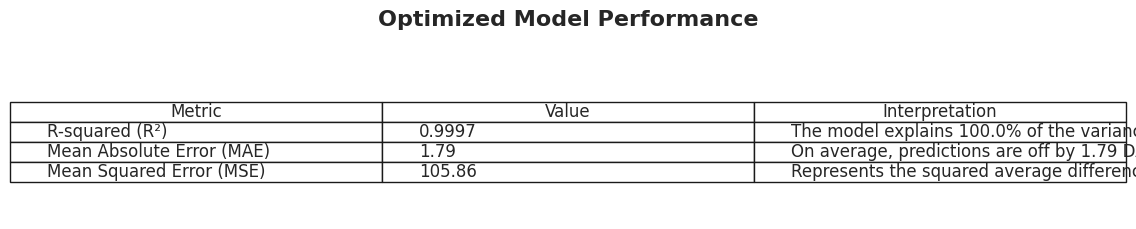

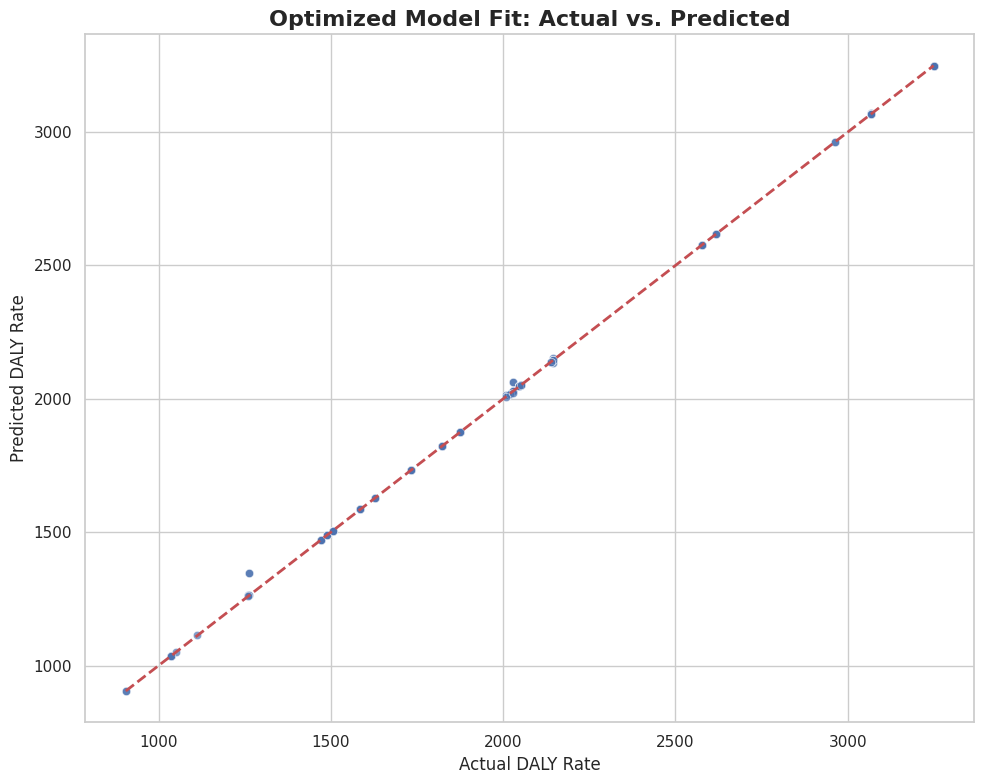

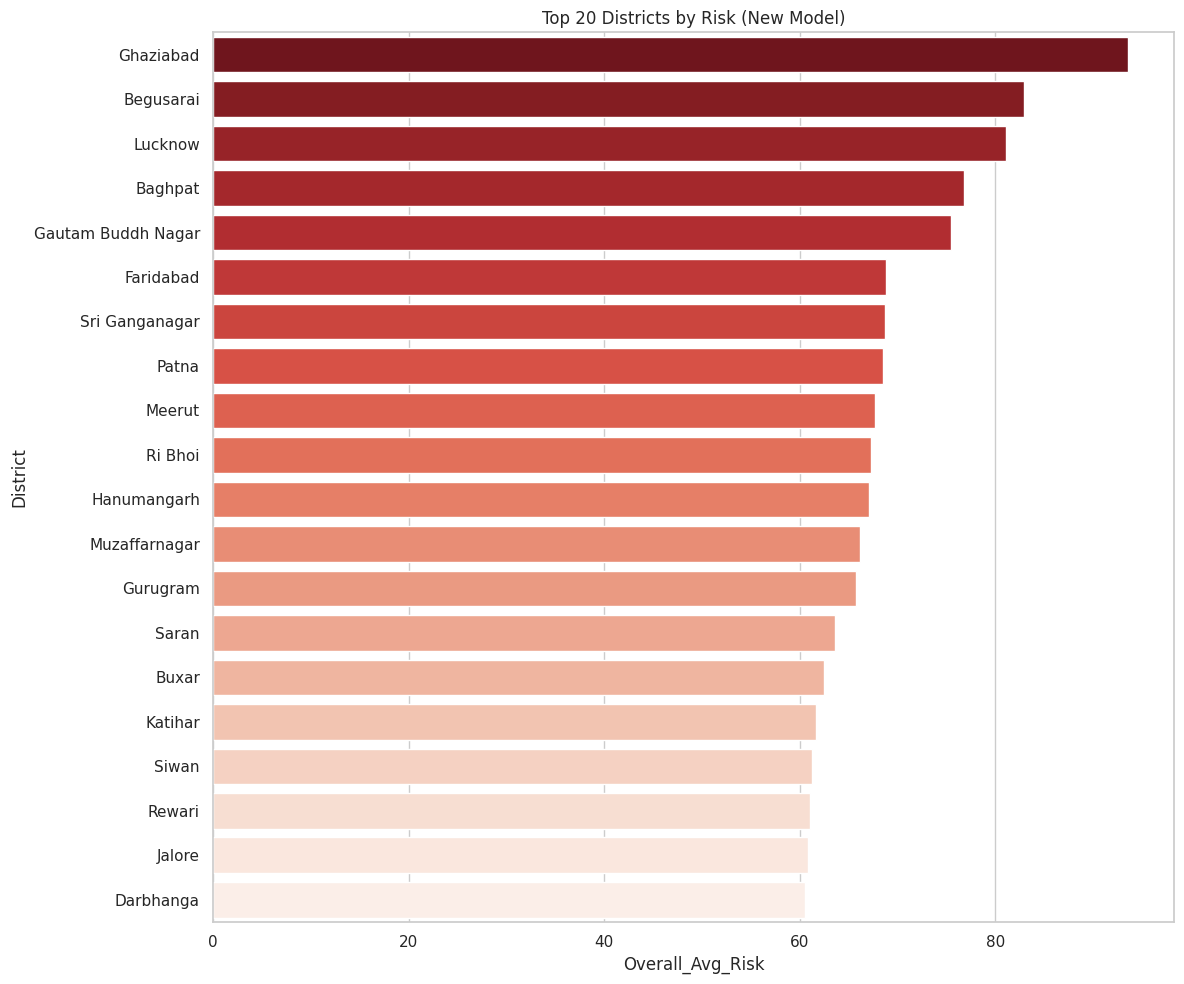

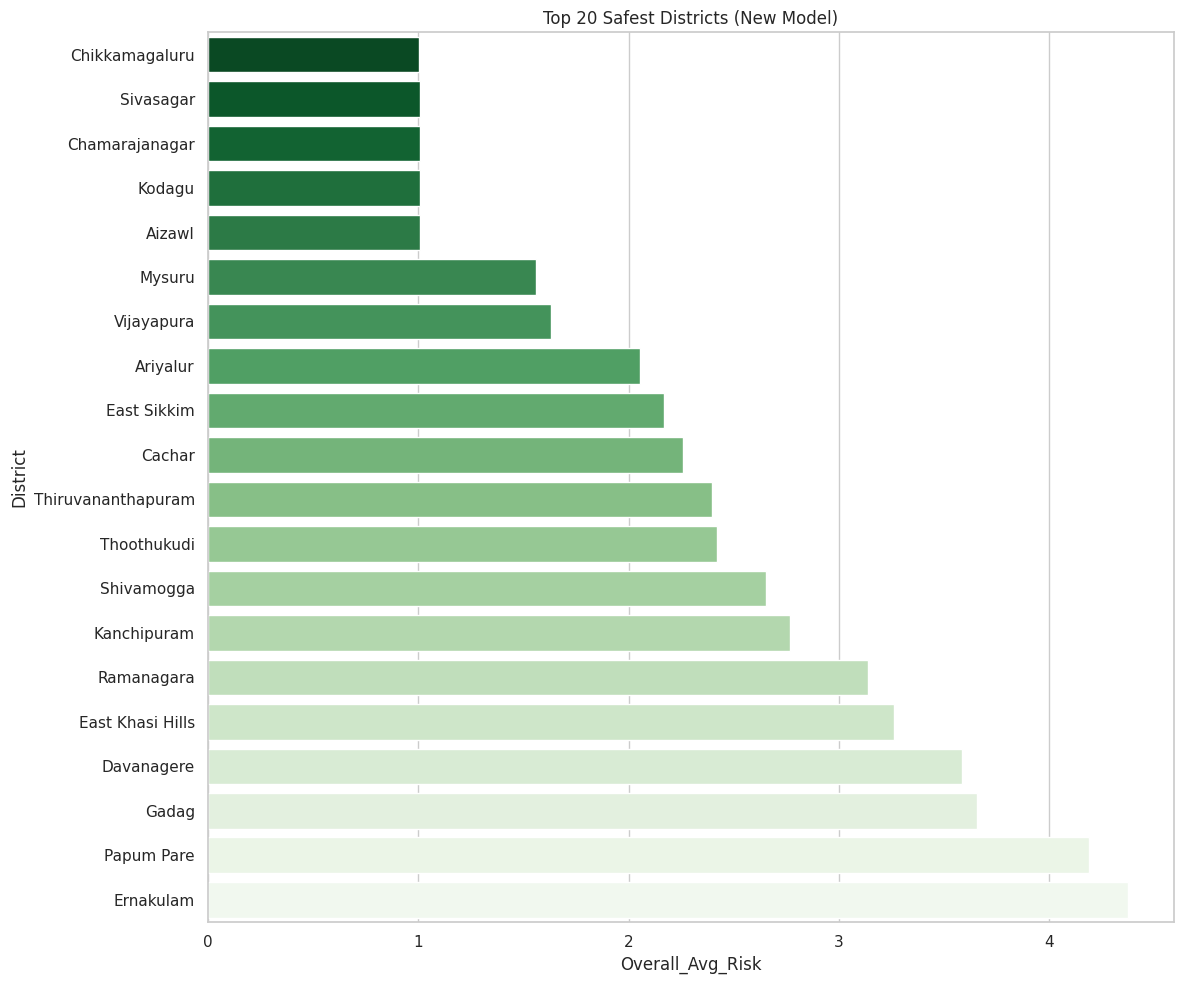

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# --- Step 1: Load All Datasets ---
print("Loading datasets...")
try:
    aqi_daily = pd.read_csv('aqidata_with_state_district.csv')
    temp_monthly = pd.read_csv('tempdata.csv')
    wind_monthly = pd.read_csv('winddata.csv')
    rain_monthly = pd.read_csv('rainfalldata.csv')
    daly_data = pd.read_csv('COPYDALY.csv')
    smoker_data = pd.read_csv('Smoker_Percentage.csv')
    hospital_data = pd.read_csv('hospital_data.csv')
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please ensure all required CSV files are in the correct directory.")
    exit()

# --- Step 2: Pre-process All Data ---
print("Preprocessing data...")
# --- Environmental Data Processing ---
aqi_daily['date'] = pd.to_datetime(aqi_daily['date'])
aqi_daily['State'] = aqi_daily['State'].str.title().str.strip()
aqi_daily['District'] = aqi_daily['District'].str.title().str.strip()
aqi_monthly = aqi_daily.groupby(['State', 'District'])['Index Value'].mean().reset_index().rename(columns={'Index Value': 'AQI'})

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

temp_monthly['State'] = temp_monthly['State'].str.title().str.strip()
temp_monthly['District'] = temp_monthly['District'].str.title().str.strip()
temp_monthly['Month'] = temp_monthly['Month'].str.strip().map(month_map)
temp = temp_monthly.rename(columns={"Temperature (in °C)": "T"})

rain_monthly['State'] = rain_monthly['State'].str.title().str.strip()
rain_monthly['District'] = rain_monthly['District'].str.title().str.strip()
rain_monthly['Month'] = rain_monthly['Month'].str.strip().map(month_map)
rain = rain_monthly.rename(columns={"Rainfall (mm)": "R"})

wind_monthly['State'] = wind_monthly['State'].str.title().str.strip()
wind_monthly['District'] = wind_monthly['District'].str.title().str.strip()
wind_monthly['Month'] = wind_monthly['Monthly Average (1999-2014)'].map(month_map)
wind = wind_monthly.rename(columns={"Speed (in m/s)": "W"})[['State', 'District', 'Month', 'W']]

# --- Behavioral & Regional Data Processing ---
daly_data.rename(columns={'Region/State': 'State'}, inplace=True)
daly_data['State'] = daly_data['State'].str.title().str.strip()
daly_data['COPD_DALY'] = daly_data['COPD (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['Asthma_DALY'] = daly_data['Asthma (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['DALY_Respiratory'] = daly_data['COPD_DALY'] + daly_data['Asthma_DALY']


smoker_data['State'] = smoker_data['State'].str.title().str.strip()
smoker_data.rename(columns=lambda x: x.strip(), inplace=True)
behavioral_df = pd.merge(daly_data[['State', 'DALY_Respiratory']], smoker_data[['State', 'Male', 'Female']], on='State', how='inner')

hospital_data.rename(columns={'State/UT Division': 'State'}, inplace=True)
hospital_data['State'] = hospital_data['State'].str.title().str.strip()
hospital_data['Beds_per_1000'] = hospital_data['Total Hospitals Beds'] / hospital_data["Population as on reference period (in '000)"]
regional_df = hospital_data[['State', 'Beds_per_1000']]
print("Data preprocessing complete.")

# --- Step 3: Aggregate, Merge, and Impute ---
print("Aggregating environmental data...")
for df_clean in [rain, temp, wind]:
    df_clean.dropna(subset=['Month'], inplace=True)
    df_clean['Month'] = df_clean['Month'].astype(int)

df_monthly = pd.merge(rain, temp, on=['State', 'District', 'Year', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, wind, on=['State', 'District', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, aqi_monthly, on=['State', 'District'], how='outer')

for col in ['AQI', 'T', 'W', 'R']:
    df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)

district_environmental_avg = df_monthly.groupby(['State', 'District'])[['AQI', 'T', 'W', 'R']].mean().reset_index()

# Merge all data together at the district level
df = pd.merge(district_environmental_avg, behavioral_df, on='State', how='left')
df = pd.merge(df, regional_df, on='State', how='left')

for col in ['DALY_Respiratory', 'Male', 'Female', 'Beds_per_1000']:
    df[col].fillna(df[col].mean(), inplace=True)
print("Data aggregation complete.")

# --- Step 4: NEW ML ARCHITECTURE - Feature Engineering with State-Level Context ---
print("\n" + "="*80)
print("--- Building a Better-Fit Model with New Architecture ---")
print("="*80)
print("\n**1. Feature Engineering with State-Level Context:**")
# Calculate state-level environmental averages
state_env_avg = df.groupby('State')[['AQI', 'T', 'W', 'R']].mean().reset_index()
state_env_avg.rename(columns={'AQI': 'State_AQI', 'T': 'State_T', 'W': 'State_W', 'R': 'State_R'}, inplace=True)

# Merge these state-level features back into the main district-level dataframe
df = pd.merge(df, state_env_avg, on='State', how='left')

print("Added state-level environmental averages as features for the model.")

# Define the full feature set: District environment + State context
X_features = df[['AQI', 'T', 'W', 'R', 'State_AQI', 'State_T', 'State_W', 'State_R', 'Male', 'Female', 'Beds_per_1000']]
y_target = df['DALY_Respiratory']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

# --- Step 5: Hyperparameter Tuning for Optimal Fit ---
print("\n**2. Hyperparameter Tuning with GridSearchCV:**")
param_grid = {
    'n_estimators': [100, 200, 300], 'max_depth': [5, 7, 10], 'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]
}
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')
print("Searching for the best model parameters with new architecture...")
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# --- Step 6: Performance Analysis of the Optimized Model ---
print("\n--- Performance Analysis of Architecturally-Improved Model ---")
y_pred = best_model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
metrics_df = pd.DataFrame({
    'Metric': ['R-squared (R²)', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)'],
    'Value': [f"{r2:.4f}", f"{mae:.2f}", f"{mse:.2f}"],
    'Interpretation': [ f"The model explains {r2:.1%} of the variance.", f"On average, predictions are off by {mae:.2f} DALY points.", "Represents the squared average difference." ]
})
# Storing the performance summary as a string for later saving
performance_summary = metrics_df.to_string(index=False)
print(performance_summary)

fig_table, ax_table = plt.subplots(figsize=(12, 2)); ax_table.axis('tight'); ax_table.axis('off')
the_table = ax_table.table(cellText=metrics_df.values, colLabels=metrics_df.columns, loc='center', cellLoc='left')
the_table.auto_set_font_size(False); the_table.set_fontsize(12); the_table.scale(1.2, 1.2)
plt.title('Optimized Model Performance', fontsize=16, weight='bold', y=1.2)

fig_perf1, ax_perf1 = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax_perf1)
ax_perf1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
ax_perf1.set_xlabel('Actual DALY Rate'); ax_perf1.set_ylabel('Predicted DALY Rate')
ax_perf1.set_title('Optimized Model Fit: Actual vs. Predicted', fontsize=16, weight='bold')
plt.tight_layout()

# --- Step 7: NEW MATHEMATICAL MODEL (from scratch) ---
print("\n" + "="*80)
print("--- Applying New Research-Inspired Mathematical Model (HAQI Approach) ---")
print("="*80)

def calculate_HAQI_risk(row):
    BETA_AQI = 0.004; BETA_TEMP_STRESS = 0.02
    aqi_excess_risk = np.exp(BETA_AQI * max(0, row['AQI'] - 50)) - 1
    temp_excess_risk = np.exp(BETA_TEMP_STRESS * max(0, abs(row['T'] - 20))) - 1
    total_stressor_risk = aqi_excess_risk + temp_excess_risk
    wind_mitigation_factor = np.exp(-0.5 * (row['W'] / df['W'].mean()))
    rain_mitigation_factor = np.exp(-0.8 * (row['R'] / df['R'].mean()))
    final_risk = total_stressor_risk * wind_mitigation_factor * rain_mitigation_factor
    return final_risk

df['Total_Environmental_Risk'] = df.apply(calculate_HAQI_risk, axis=1)
print("New 'Total_Environmental_Risk' calculated for all districts using HAQI approach.")

# --- Step 8: Train Final Model and Calculate PHRS ---
print("\nTraining final model on all data and calculating PHRS...")
final_environmental_model = grid_search.best_estimator_
final_environmental_model.fit(X_scaled, y_target)
df['Baseline_Health_Risk'] = final_environmental_model.predict(X_scaled)

S_WEIGHT = 0.5
df['Male_Smoking_Penalty'] = np.log1p(df['Male'] * S_WEIGHT / 100)
df['Female_Smoking_Penalty'] = np.log1p(df['Female'] * S_WEIGHT / 100)
scaler_baseline = MinMaxScaler(); scaler_regional = MinMaxScaler()
df['Behavioral_Modifier_Baseline'] = scaler_baseline.fit_transform(df[['Baseline_Health_Risk']])
df['Regional_Modifier'] = scaler_regional.fit_transform(df[['Beds_per_1000']])

FEMALE_SUSCEPTIBILITY_FACTOR = 1.17
base_environmental_risk = df['Total_Environmental_Risk']

df['PHRS_Raw_Male_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier'])
df['PHRS_Raw_Male_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Male_Smoking_Penalty'] - df['Regional_Modifier'])
df['PHRS_Raw_Female_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR
df['PHRS_Raw_Female_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Female_Smoking_Penalty'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR

all_raw_scores = pd.concat([
    df['PHRS_Raw_Male_Smoker'], df['PHRS_Raw_Male_Non_Smoker'],
    df['PHRS_Raw_Female_Smoker'], df['PHRS_Raw_Female_Non_Smoker']
])
global_min_risk, global_max_risk = all_raw_scores.min(), all_raw_scores.max()

def scale_phrs_unified(phrs_raw_series, min_risk, max_risk):
    if (max_risk - min_risk) == 0: return 1.0
    return 1 + 99 * ((phrs_raw_series - min_risk) / (max_risk - min_risk))

df['PHRS_Male_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Male_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Non_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Non_Smoker'], global_min_risk, global_max_risk)
print("PHRS calculation complete.")

# --- Step 9: Generate Final Results and Text Insights ---
final_cols = ['State', 'District', 'AQI', 'T', 'W', 'R', 'PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']
df_final = df[final_cols]
df_final['Overall_Avg_Risk'] = df_final[['PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']].mean(axis=1)

top_20_risk_districts = df_final.sort_values(by='Overall_Avg_Risk', ascending=False).head(20)
lowest_20_risk_districts = df_final.sort_values(by='Overall_Avg_Risk', ascending=True).head(20)
worst_male_smoker = df_final.sort_values(by='PHRS_Male_Smoker', ascending=False).iloc[0]
safest_male_smoker = df_final.sort_values(by='PHRS_Male_Smoker', ascending=True).iloc[0]
worst_female_smoker = df_final.sort_values(by='PHRS_Female_Smoker', ascending=False).iloc[0]
safest_female_smoker = df_final.sort_values(by='PHRS_Female_Smoker', ascending=True).iloc[0]

# --- Build the summary string ---
summary_string = "="*80 + "\n"
summary_string += "--- PHRS MODEL ANALYSIS SUMMARY ---\n"
summary_string += "="*80 + "\n\n"
summary_string += "**1. Model Performance Metrics:**\n" + performance_summary + "\n\n"
summary_string += "**2. Identification of High and Low-Risk Zones:**\n\n"
summary_string += "*Top 20 Highest-Risk Districts (Descending Order):*\n"
for i, row in top_20_risk_districts.iterrows():
    summary_string += f"  - {row['District']}, {row['State']} (Avg PHRS: {row['Overall_Avg_Risk']:.2f})\n"
summary_string += "\n*Top 20 Lowest-Risk (Safest) Districts (Ascending Order):*\n"
for i, row in lowest_20_risk_districts.iterrows():
    summary_string += f"  - {row['District']}, {row['State']} (Avg PHRS: {row['Overall_Avg_Risk']:.2f})\n"
summary_string += "\n**3. Demographic-Specific Risk Extremes:**\n"
summary_string += f"\n- Male Smokers:\n"
summary_string += f"  - Highest Risk: {worst_male_smoker['District']}, {worst_male_smoker['State']} (PHRS: {worst_male_smoker['PHRS_Male_Smoker']:.2f})\n"
summary_string += f"  - Lowest Risk:  {safest_male_smoker['District']}, {safest_male_smoker['State']} (PHRS: {safest_male_smoker['PHRS_Male_Smoker']:.2f})\n"
summary_string += f"\n- Female Smokers:\n"
summary_string += f"  - Highest Risk: {worst_female_smoker['District']}, {worst_female_smoker['State']} (PHRS: {worst_female_smoker['PHRS_Female_Smoker']:.2f})\n"
summary_string += f"  - Lowest Risk:  {safest_female_smoker['District']}, {safest_female_smoker['State']} (PHRS: {safest_female_smoker['PHRS_Female_Smoker']:.2f})\n"

print("\n" + summary_string)

# --- Step 10: Save All Results to Files ---
print("\n" + "="*80)
print("--- Saving All Results to Files ---")
print("="*80)

# 1. Save main results DataFrame to CSV
output_csv_path = 'PHRS_Final_New_Model_Results.csv'
df_final.round(2).to_csv(output_csv_path, index=False)
print(f"Final data saved to: '{output_csv_path}'")

# 2. Save text summary to TXT file
summary_file_path = 'PHRS_Analysis_Summary.txt'
with open(summary_file_path, 'w') as f:
    f.write(summary_string)
print(f"Textual insights saved to: '{summary_file_path}'")

# 3. Save all generated plots to PNG
fig_table.savefig('performance_metrics_table.png', dpi=300, bbox_inches='tight')
print("Saved: performance_metrics_table.png")
fig_perf1.savefig('performance_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print("Saved: performance_actual_vs_predicted.png")

# Generate and save the final insight plots
sns.set_theme(style="whitegrid")
fig1, ax1 = plt.subplots(figsize=(12, 10))
sns.barplot(data=top_20_risk_districts.sort_values('Overall_Avg_Risk', ascending=False),
            x='Overall_Avg_Risk', y='District', palette='Reds_r', ax=ax1)
plt.title('Top 20 Districts by Risk (New Model)')
plt.tight_layout()
fig1.savefig('top_20_risk_districts.png', dpi=300, bbox_inches='tight')
print("Saved: top_20_risk_districts.png")

fig2, ax2 = plt.subplots(figsize=(12, 10))
sns.barplot(data=lowest_20_risk_districts.sort_values('Overall_Avg_Risk', ascending=True),
            x='Overall_Avg_Risk', y='District', palette='Greens_r', ax=ax2)
plt.title('Top 20 Safest Districts (New Model)')
plt.tight_layout()
fig2.savefig('safest_20_districts.png', dpi=300, bbox_inches='tight')
print("Saved: safest_20_districts.png")

print("\nAll results and visualizations have been saved.")

# --- Step 11: Display Visualizations ---
print("\nDisplaying graphs...")
plt.show()



Loading datasets...
All datasets loaded successfully.
Preprocessing data...
Data preprocessing complete.
Aggregating environmental data...


/tmp/ipython-input-1872254745.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)
/tmp/ipython-input-1872254745.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Data aggregation complete.
Feature engineering...
Hyperparameter tuning...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

--- Performance Analysis of Architecturally-Improved Model ---
Optimized Model R-squared: 0.9997
Applying HAQI mathematical model...
Training final model and calculating PHRS...
PHRS calculation complete.

--- Generating Final Insights and Visualizations ---
Final results saved to 'PHRS_Final_New_Model_Results.csv'


/tmp/ipython-input-1872254745.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_risk_districts, x='Overall_Avg_Risk', y='District', palette='Reds_r')
/tmp/ipython-input-1872254745.py:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
/tmp/ipython-input-1872254745.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Overall_Avg_Risk', y='State', order=state_order, palette='coolwarm')



Displaying all generated graphs...


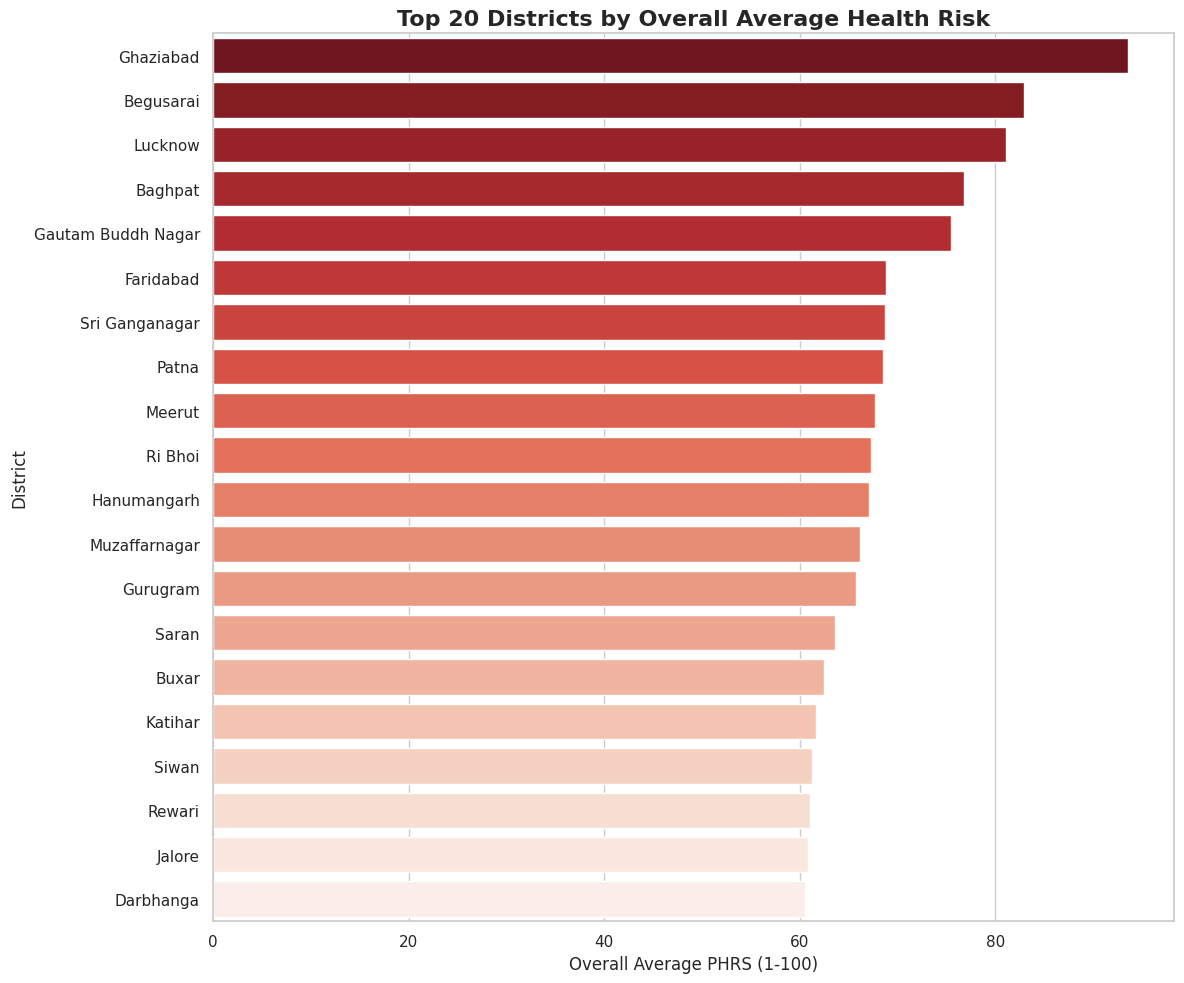

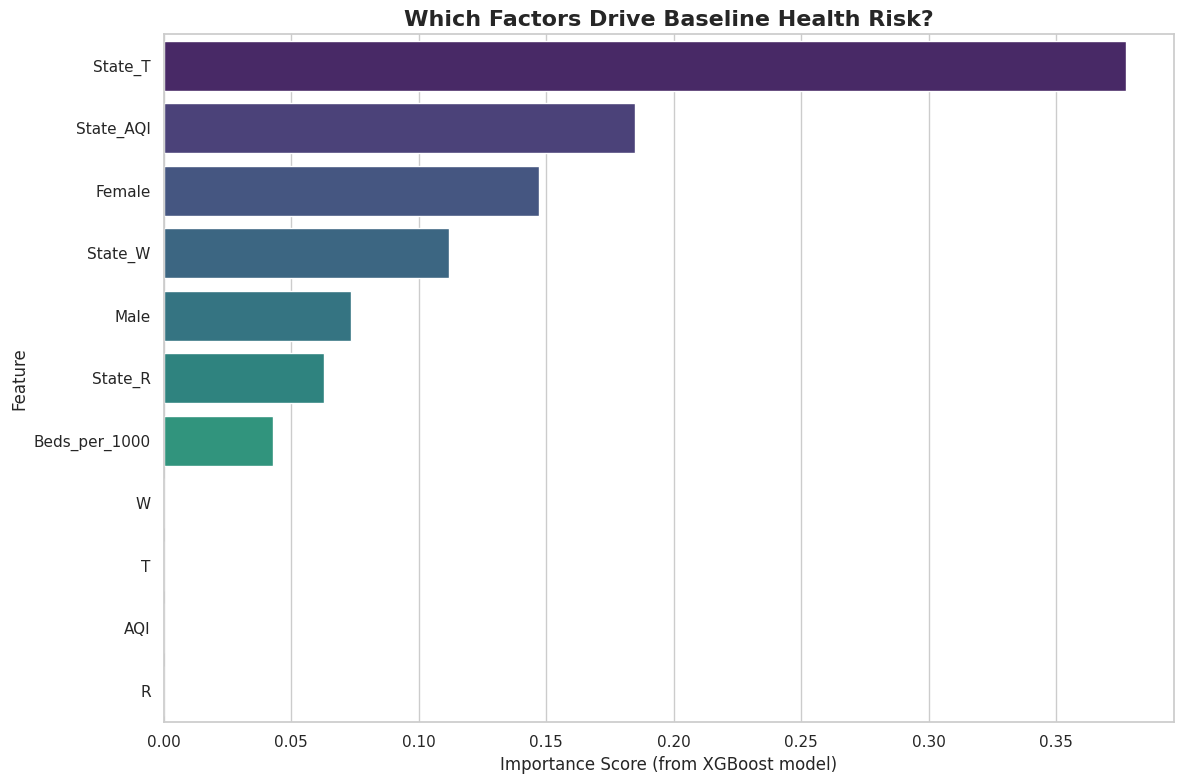

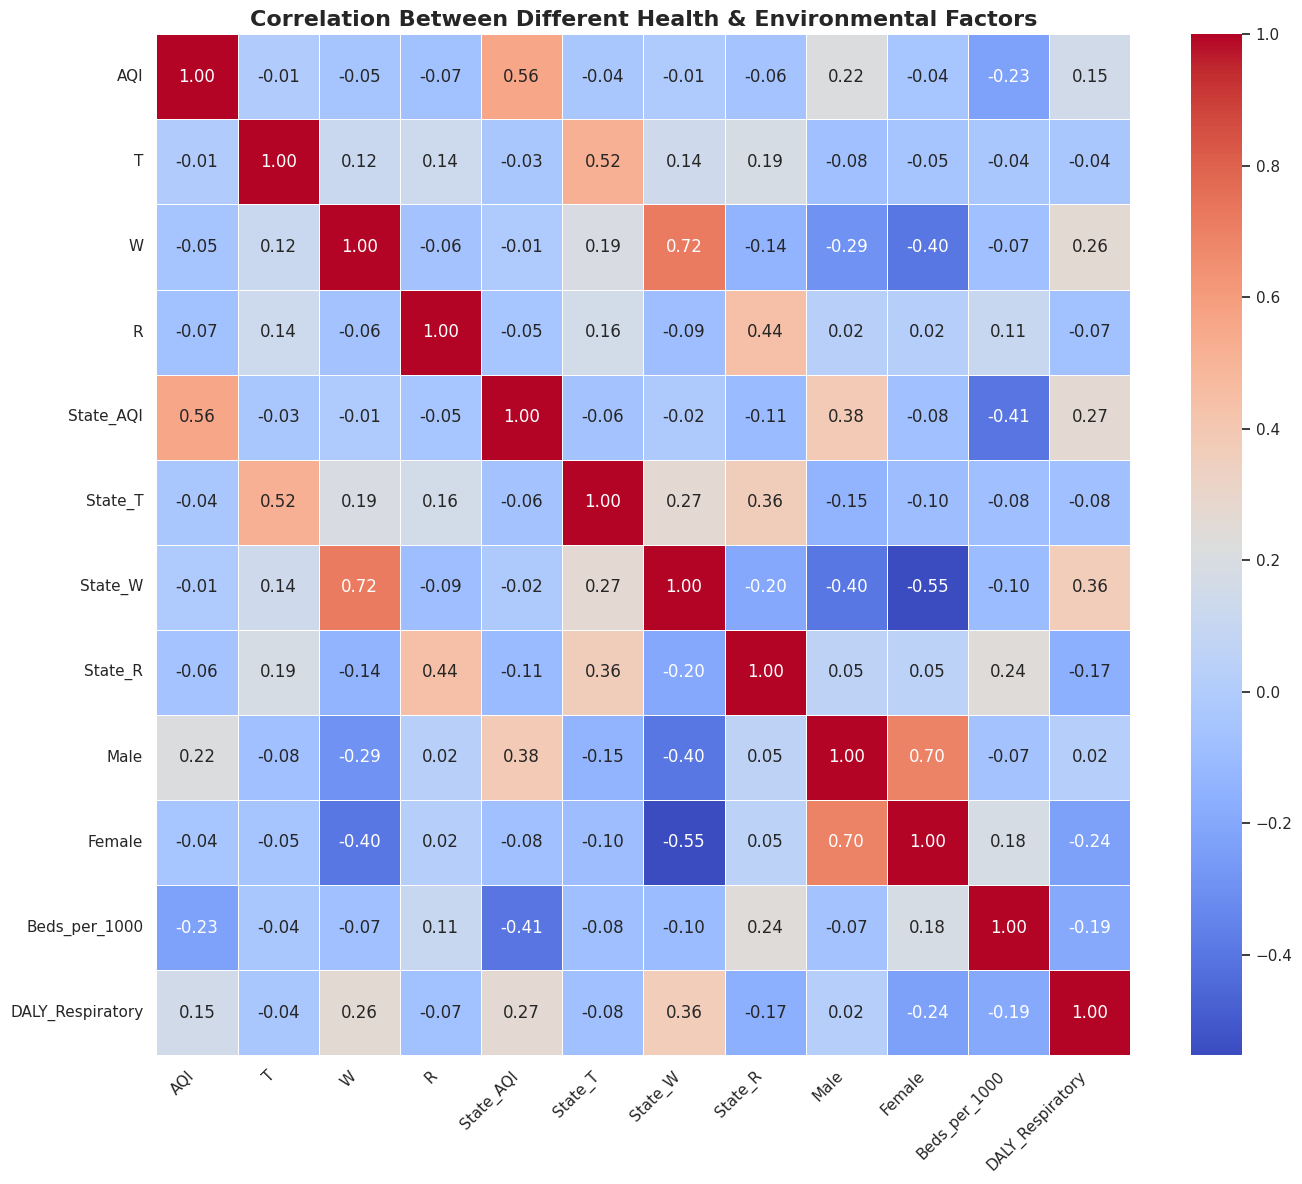

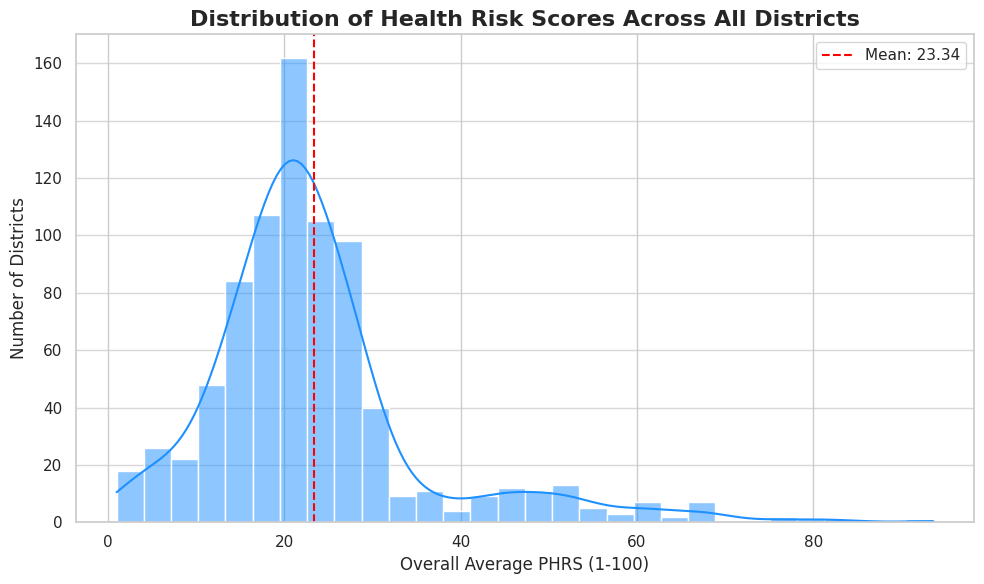

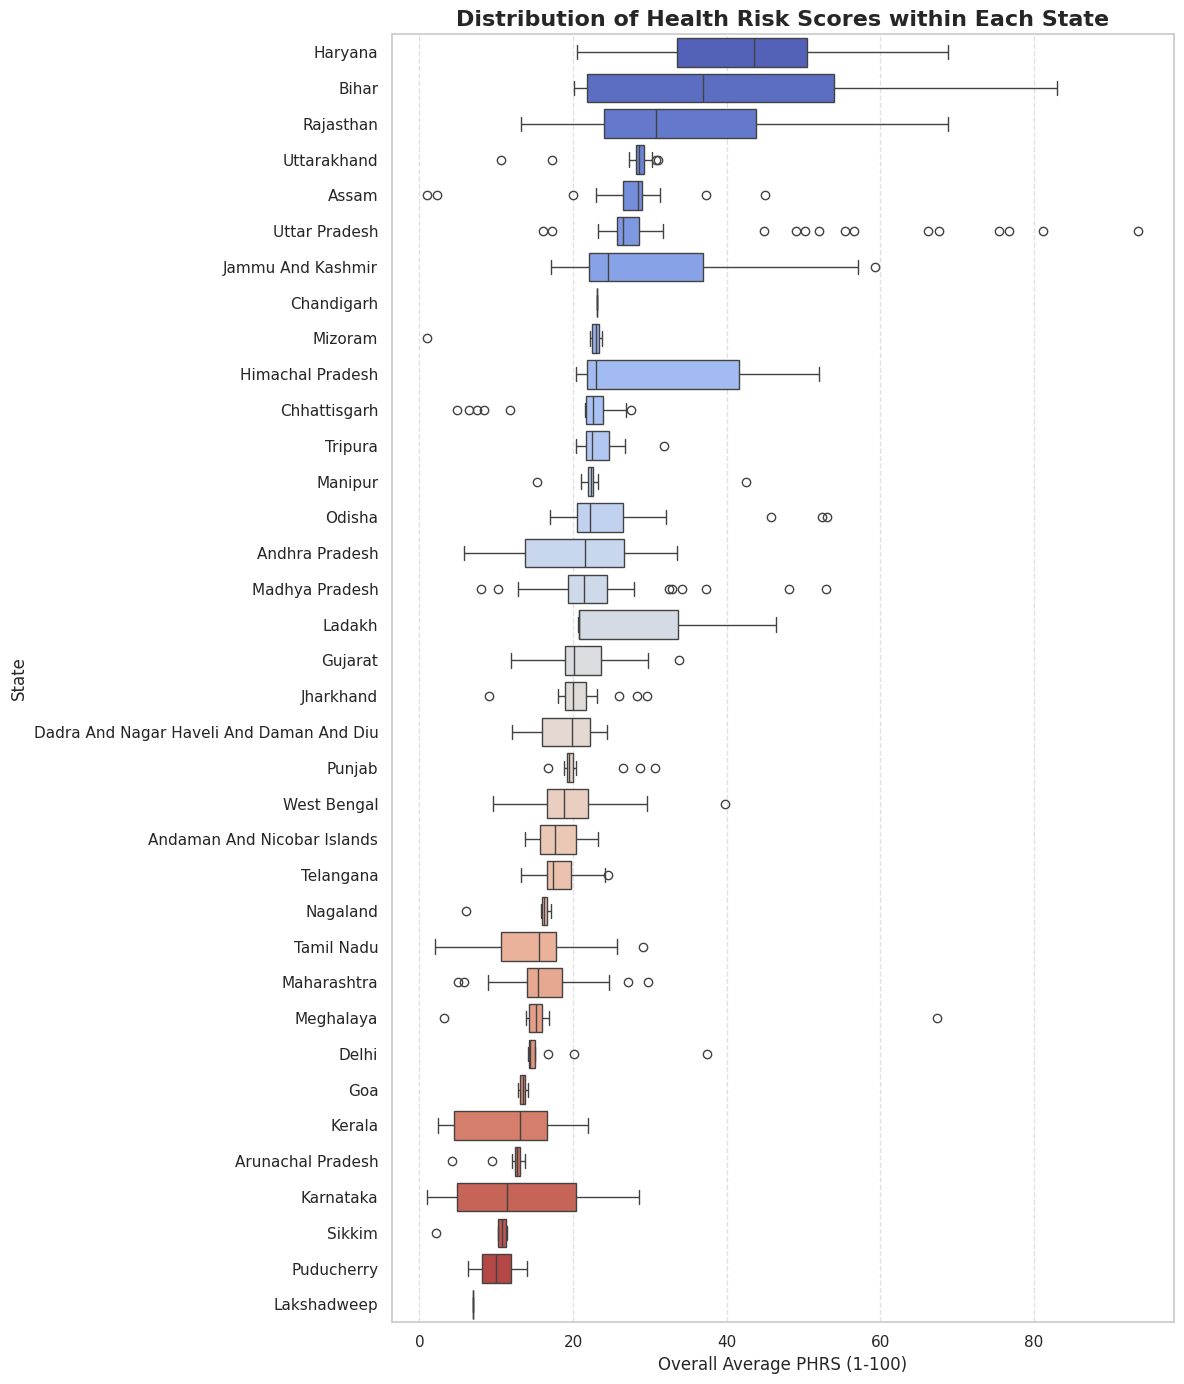

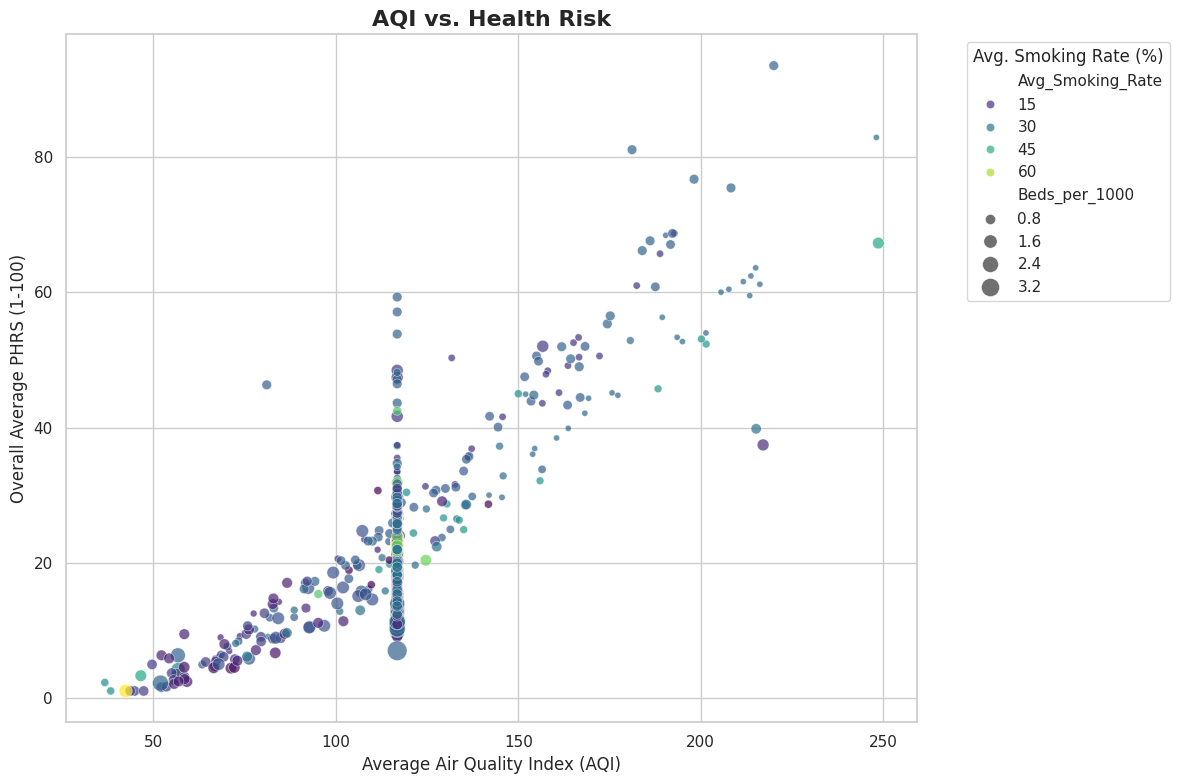

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# --- Step 1: Load All Datasets ---
print("Loading datasets...")
try:
    # Make sure these files are in the same directory as your script
    aqi_daily = pd.read_csv('aqidata_with_state_district.csv')
    temp_monthly = pd.read_csv('tempdata.csv')
    wind_monthly = pd.read_csv('winddata.csv')
    rain_monthly = pd.read_csv('rainfalldata.csv')
    daly_data = pd.read_csv('COPYDALY.csv')
    smoker_data = pd.read_csv('Smoker_Percentage.csv')
    hospital_data = pd.read_csv('hospital_data.csv')
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please ensure all required CSV files are in the correct directory.")
    exit()

# --- Step 2: Pre-process All Data ---
print("Preprocessing data...")
# --- Environmental Data Processing ---
aqi_daily['date'] = pd.to_datetime(aqi_daily['date'])
aqi_daily['State'] = aqi_daily['State'].str.title().str.strip()
aqi_daily['District'] = aqi_daily['District'].str.title().str.strip()
aqi_monthly = aqi_daily.groupby(['State', 'District'])['Index Value'].mean().reset_index().rename(columns={'Index Value': 'AQI'})

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

temp_monthly['State'] = temp_monthly['State'].str.title().str.strip()
temp_monthly['District'] = temp_monthly['District'].str.title().str.strip()
temp_monthly['Month'] = temp_monthly['Month'].str.strip().map(month_map)
temp = temp_monthly.rename(columns={"Temperature (in °C)": "T"})

rain_monthly['State'] = rain_monthly['State'].str.title().str.strip()
rain_monthly['District'] = rain_monthly['District'].str.title().str.strip()
rain_monthly['Month'] = rain_monthly['Month'].str.strip().map(month_map)
rain = rain_monthly.rename(columns={"Rainfall (mm)": "R"})

wind_monthly['State'] = wind_monthly['State'].str.title().str.strip()
wind_monthly['District'] = wind_monthly['District'].str.title().str.strip()
wind_monthly['Month'] = wind_monthly['Monthly Average (1999-2014)'].map(month_map)
wind = wind_monthly.rename(columns={"Speed (in m/s)": "W"})[['State', 'District', 'Month', 'W']]

# --- Behavioral & Regional Data Processing ---
daly_data.rename(columns={'Region/State': 'State'}, inplace=True)
daly_data['State'] = daly_data['State'].str.title().str.strip()
daly_data['COPD_DALY'] = daly_data['COPD (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['Asthma_DALY'] = daly_data['Asthma (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['DALY_Respiratory'] = daly_data['COPD_DALY'] + daly_data['Asthma_DALY']


smoker_data['State'] = smoker_data['State'].str.title().str.strip()
smoker_data.rename(columns=lambda x: x.strip(), inplace=True)
behavioral_df = pd.merge(daly_data[['State', 'DALY_Respiratory']], smoker_data[['State', 'Male', 'Female']], on='State', how='inner')

hospital_data.rename(columns={'State/UT Division': 'State'}, inplace=True)
hospital_data['State'] = hospital_data['State'].str.title().str.strip()
hospital_data['Beds_per_1000'] = hospital_data['Total Hospitals Beds'] / hospital_data["Population as on reference period (in '000)"]
regional_df = hospital_data[['State', 'Beds_per_1000']]
print("Data preprocessing complete.")

# --- Step 3: Aggregate, Merge, and Impute ---
print("Aggregating environmental data...")
for df_clean in [rain, temp, wind]:
    df_clean.dropna(subset=['Month'], inplace=True)
    df_clean['Month'] = df_clean['Month'].astype(int)

df_monthly = pd.merge(rain, temp, on=['State', 'District', 'Year', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, wind, on=['State', 'District', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, aqi_monthly, on=['State', 'District'], how='outer')

for col in ['AQI', 'T', 'W', 'R']:
    df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)

district_environmental_avg = df_monthly.groupby(['State', 'District'])[['AQI', 'T', 'W', 'R']].mean().reset_index()

# Merge all data together at the district level
df = pd.merge(district_environmental_avg, behavioral_df, on='State', how='left')
df = pd.merge(df, regional_df, on='State', how='left')

for col in ['DALY_Respiratory', 'Male', 'Female', 'Beds_per_1000']:
    df[col].fillna(df[col].mean(), inplace=True)
print("Data aggregation complete.")

# --- Step 4: Feature Engineering with State-Level Context ---
print("Feature engineering...")
state_env_avg = df.groupby('State')[['AQI', 'T', 'W', 'R']].mean().reset_index()
state_env_avg.rename(columns={'AQI': 'State_AQI', 'T': 'State_T', 'W': 'State_W', 'R': 'State_R'}, inplace=True)
df = pd.merge(df, state_env_avg, on='State', how='left')

# Define the full feature set
X_features_df = df[['AQI', 'T', 'W', 'R', 'State_AQI', 'State_T', 'State_W', 'State_R', 'Male', 'Female', 'Beds_per_1000']]
y_target = df['DALY_Respiratory']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features_df)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

# --- Step 5: Hyperparameter Tuning ---
print("Hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200, 300], 'max_depth': [5, 7, 10], 'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]
}
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")

# --- Step 6: Performance Analysis of the Optimized Model ---
print("\n--- Performance Analysis of Architecturally-Improved Model ---")
y_pred = best_model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(f"Optimized Model R-squared: {r2:.4f}")

# --- Step 7: Mathematical Model (HAQI Approach) ---
print("Applying HAQI mathematical model...")
def calculate_HAQI_risk(row):
    BETA_AQI, BETA_TEMP_STRESS = 0.004, 0.02
    aqi_excess_risk = np.exp(BETA_AQI * max(0, row['AQI'] - 50)) - 1
    temp_excess_risk = np.exp(BETA_TEMP_STRESS * max(0, abs(row['T'] - 20))) - 1
    total_stressor_risk = aqi_excess_risk + temp_excess_risk
    wind_mitigation_factor = np.exp(-0.5 * (row['W'] / df['W'].mean()))
    rain_mitigation_factor = np.exp(-0.8 * (row['R'] / df['R'].mean()))
    return total_stressor_risk * wind_mitigation_factor * rain_mitigation_factor

df['Total_Environmental_Risk'] = df.apply(calculate_HAQI_risk, axis=1)

# --- Step 8: Train Final Model and Calculate PHRS ---
print("Training final model and calculating PHRS...")
final_environmental_model = grid_search.best_estimator_
final_environmental_model.fit(X_scaled, y_target)
df['Baseline_Health_Risk'] = final_environmental_model.predict(X_scaled)

S_WEIGHT = 0.5
df['Male_Smoking_Penalty'] = np.log1p(df['Male'] * S_WEIGHT / 100)
df['Female_Smoking_Penalty'] = np.log1p(df['Female'] * S_WEIGHT / 100)
df['Behavioral_Modifier_Baseline'] = MinMaxScaler().fit_transform(df[['Baseline_Health_Risk']])
df['Regional_Modifier'] = MinMaxScaler().fit_transform(df[['Beds_per_1000']])
FEMALE_SUSCEPTIBILITY_FACTOR = 1.17
base_environmental_risk = df['Total_Environmental_Risk']

df['PHRS_Raw_Male_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier'])
df['PHRS_Raw_Male_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Male_Smoking_Penalty'] - df['Regional_Modifier'])
df['PHRS_Raw_Female_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR
df['PHRS_Raw_Female_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Female_Smoking_Penalty'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR

all_raw_scores = pd.concat([
    df['PHRS_Raw_Male_Smoker'], df['PHRS_Raw_Male_Non_Smoker'],
    df['PHRS_Raw_Female_Smoker'], df['PHRS_Raw_Female_Non_Smoker']
])
global_min_risk, global_max_risk = all_raw_scores.min(), all_raw_scores.max()

def scale_phrs_unified(phrs_raw_series, min_risk, max_risk):
    if (max_risk - min_risk) == 0: return 1.0
    return 1 + 99 * ((phrs_raw_series - min_risk) / (max_risk - min_risk))

df['PHRS_Male_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Male_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Non_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Non_Smoker'], global_min_risk, global_max_risk)
df['Overall_Avg_Risk'] = df[['PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']].mean(axis=1)
print("PHRS calculation complete.")

# --- Step 9: Final Results, Insights, and ALL Visualizations ---
print("\n--- Generating Final Insights and Visualizations ---")
output_csv_path = 'PHRS_Final_New_Model_Results.csv'
df.round(2).to_csv(output_csv_path, index=False)
print(f"Final results saved to '{output_csv_path}'")

sns.set_theme(style="whitegrid")

# --- PLOT 1: Top 20 Highest-Risk Districts (Bar Chart) ---
top_20_risk_districts = df.sort_values(by='Overall_Avg_Risk', ascending=False).head(20)
plt.figure(figsize=(12, 10))
sns.barplot(data=top_20_risk_districts, x='Overall_Avg_Risk', y='District', palette='Reds_r')
plt.title('Top 20 Districts by Overall Average Health Risk', fontsize=16, weight='bold')
plt.xlabel('Overall Average PHRS (1-100)')
plt.ylabel('District')
plt.tight_layout()

# --- PLOT 2: Feature Importance from XGBoost Model ---
# This plot shows which factors were most predictive of the baseline respiratory DALY rate.
plt.figure(figsize=(12, 8))
importances = best_model.feature_importances_
feature_names = X_features_df.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Factors Drive Baseline Health Risk?', fontsize=16, weight='bold')
plt.xlabel('Importance Score (from XGBoost model)')
plt.ylabel('Feature')
plt.tight_layout()

# --- PLOT 3: Correlation Heatmap ---
# This shows the linear relationships between all variables.
plt.figure(figsize=(14, 12))
corr_df = X_features_df.copy()
corr_df['DALY_Respiratory'] = y_target # Add the target variable for context
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Different Health & Environmental Factors', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# --- PLOT 4: Distribution of Risk Scores Nationwide ---
# This histogram shows how many districts fall into each risk category.
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall_Avg_Risk'], kde=True, bins=30, color='dodgerblue')
plt.title('Distribution of Health Risk Scores Across All Districts', fontsize=16, weight='bold')
plt.xlabel('Overall Average PHRS (1-100)')
plt.ylabel('Number of Districts')
plt.axvline(df['Overall_Avg_Risk'].mean(), color='red', linestyle='--', label=f"Mean: {df['Overall_Avg_Risk'].mean():.2f}")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# --- PLOT 5: Risk Distribution by State (Box Plot) ---
# A box plot is great for seeing the median, spread, and outliers of risk within each state.
plt.figure(figsize=(12, 14))
# Order states by their median risk score
state_order = df.groupby('State')['Overall_Avg_Risk'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Overall_Avg_Risk', y='State', order=state_order, palette='coolwarm')
plt.title('Distribution of Health Risk Scores within Each State', fontsize=16, weight='bold')
plt.xlabel('Overall Average PHRS (1-100)')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# --- PLOT 6: AQI vs. Health Risk, colored by Smoking Rate ---
# This scatter plot helps visualize the combined impact of pollution and behavior.
df['Avg_Smoking_Rate'] = (df['Male'] + df['Female']) / 2
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='AQI',
    y='Overall_Avg_Risk',
    hue='Avg_Smoking_Rate',
    size='Beds_per_1000',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('AQI vs. Health Risk', fontsize=16, weight='bold')
plt.xlabel('Average Air Quality Index (AQI)')
plt.ylabel('Overall Average PHRS (1-100)')
plt.legend(title='Avg. Smoking Rate (%)')
scatter.legend(title='Avg. Smoking Rate (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# --- Show all the plots ---
print("\nDisplaying all generated graphs...")
plt.show()


Loading datasets...
All datasets loaded successfully.
Preprocessing data...
Data preprocessing complete.
Aggregating environmental data...
Data aggregation complete.
Feature engineering...
Hyperparameter tuning...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/tmp/ipython-input-4069233542.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)
/tmp/ipython-input-4069233542.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

--- Performance Analysis of Architecturally-Improved Model ---
Optimized Model R-squared: 0.9997
Applying HAQI mathematical model...
Training final model and calculating PHRS...
PHRS calculation complete.

--- Generating Final Insights and Visualizations ---
Final results saved to 'PHRS_Final_New_Model_Results.csv'


/tmp/ipython-input-4069233542.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_risk_districts, x='Overall_Avg_Risk', y='District', palette='Reds_r')
/tmp/ipython-input-4069233542.py:198: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
/tmp/ipython-input-4069233542.py:236: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Overall_Avg_Risk', y='State', order=state_order, palette='coolwarm')



Displaying all generated graphs...


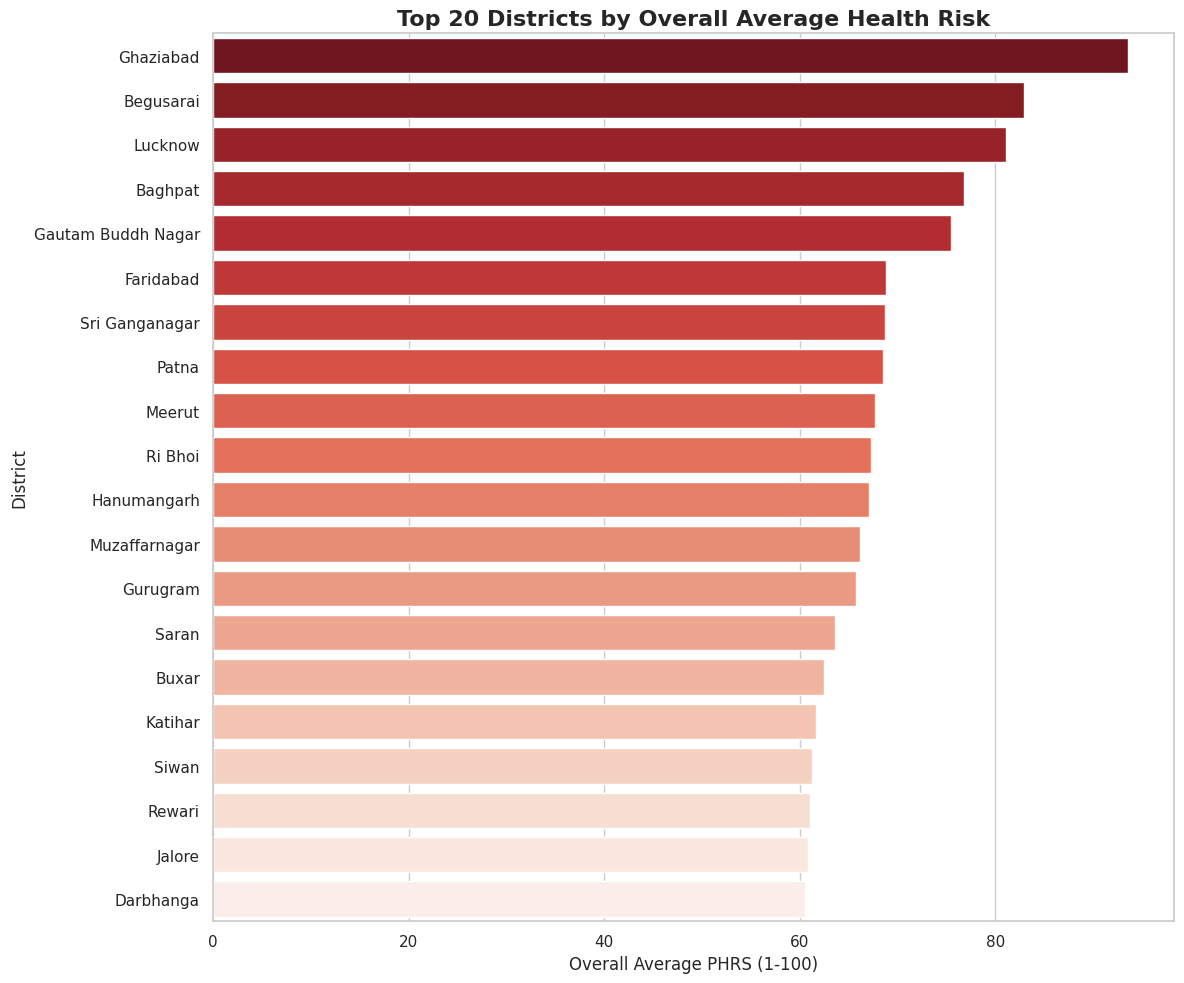

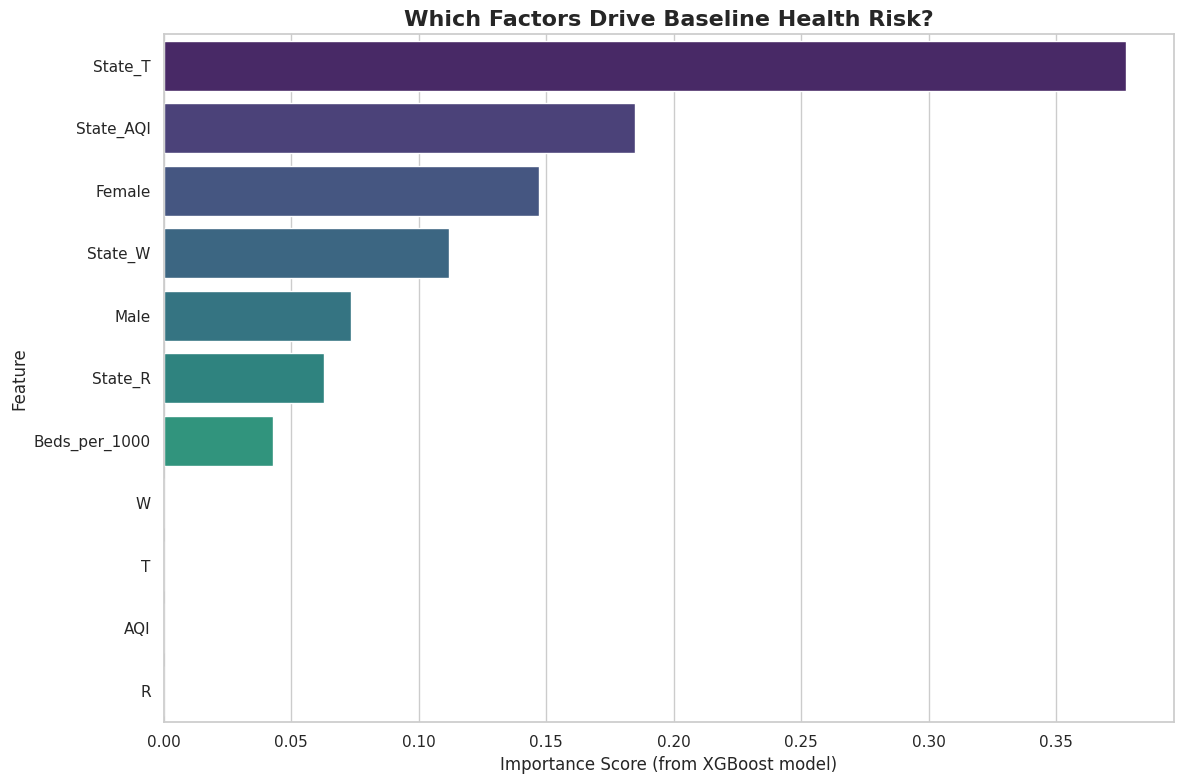

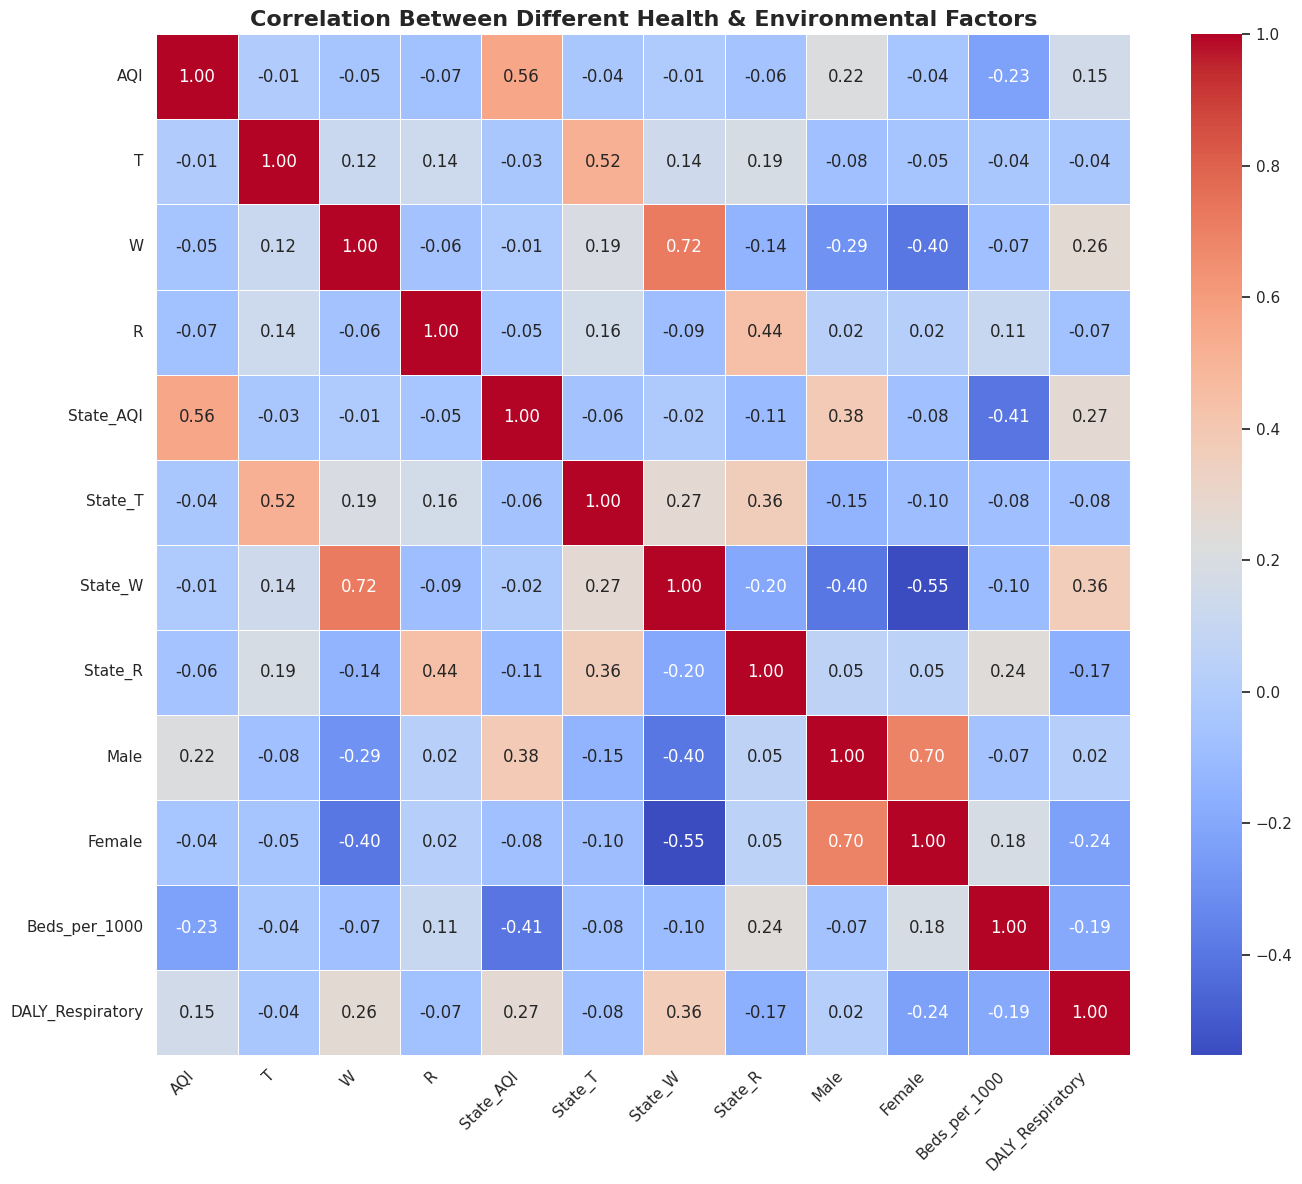

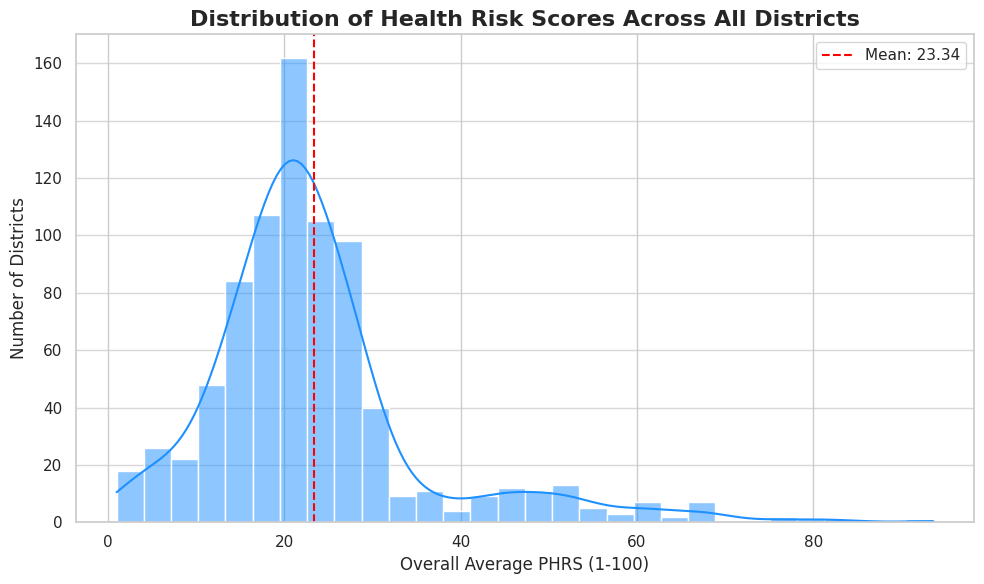

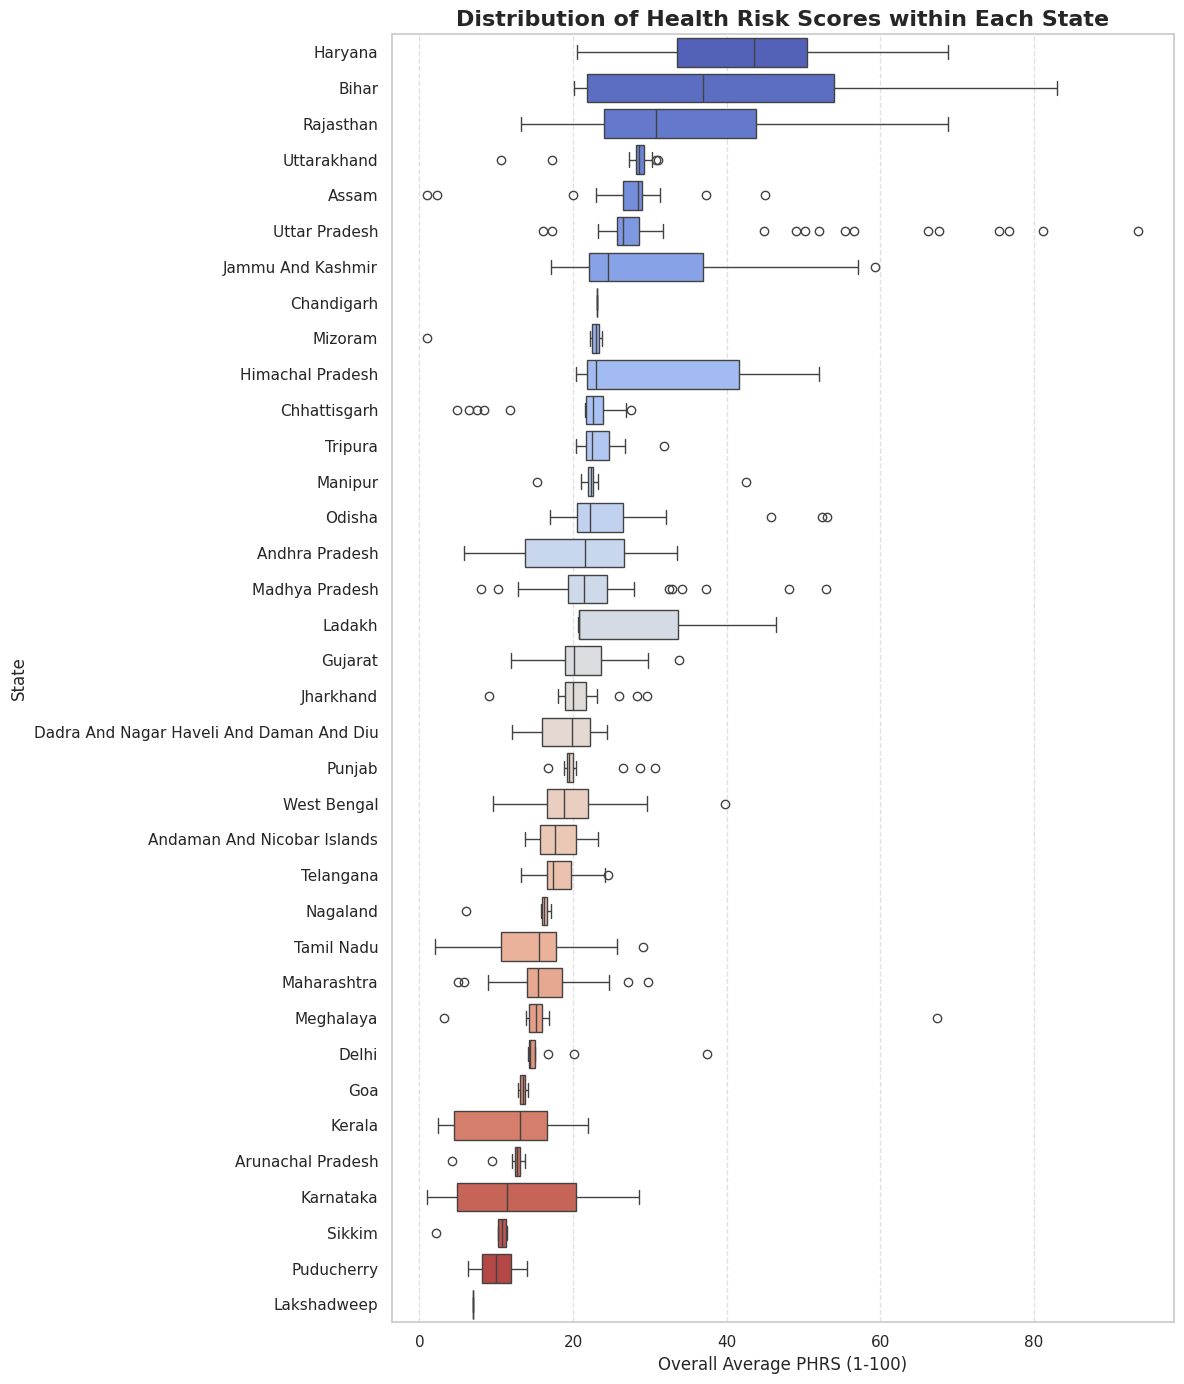

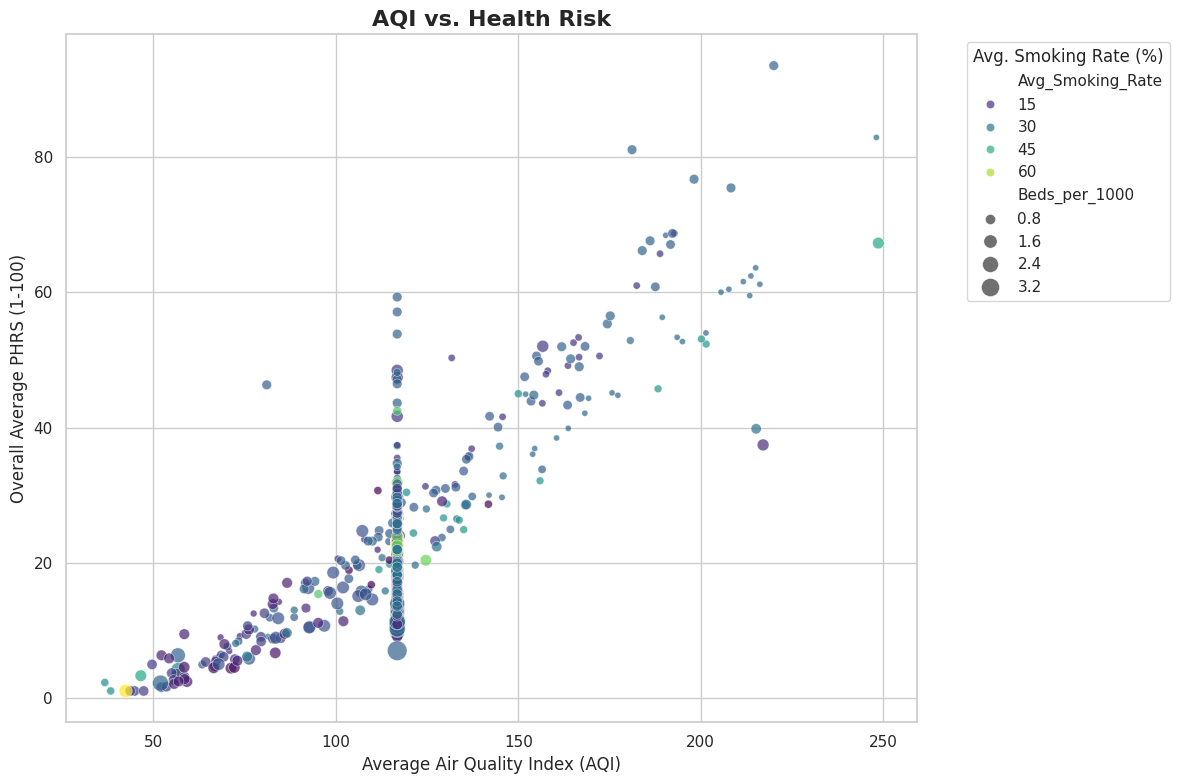

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# --- Step 1: Load All Datasets ---
print("Loading datasets...")
try:
    # Make sure these files are in the same directory as your script
    aqi_daily = pd.read_csv('aqidata_with_state_district.csv')
    temp_monthly = pd.read_csv('tempdata.csv')
    wind_monthly = pd.read_csv('winddata.csv')
    rain_monthly = pd.read_csv('rainfalldata.csv')
    daly_data = pd.read_csv('COPYDALY.csv')
    smoker_data = pd.read_csv('Smoker_Percentage.csv')
    hospital_data = pd.read_csv('hospital_data.csv')
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please ensure all required CSV files are in the correct directory.")
    exit()

# --- Step 2: Pre-process All Data ---
print("Preprocessing data...")
# --- Environmental Data Processing ---
aqi_daily['date'] = pd.to_datetime(aqi_daily['date'])
aqi_daily['State'] = aqi_daily['State'].str.title().str.strip()
aqi_daily['District'] = aqi_daily['District'].str.title().str.strip()
aqi_monthly = aqi_daily.groupby(['State', 'District'])['Index Value'].mean().reset_index().rename(columns={'Index Value': 'AQI'})

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

temp_monthly['State'] = temp_monthly['State'].str.title().str.strip()
temp_monthly['District'] = temp_monthly['District'].str.title().str.strip()
temp_monthly['Month'] = temp_monthly['Month'].str.strip().map(month_map)
temp = temp_monthly.rename(columns={"Temperature (in °C)": "T"})

rain_monthly['State'] = rain_monthly['State'].str.title().str.strip()
rain_monthly['District'] = rain_monthly['District'].str.title().str.strip()
rain_monthly['Month'] = rain_monthly['Month'].str.strip().map(month_map)
rain = rain_monthly.rename(columns={"Rainfall (mm)": "R"})

wind_monthly['State'] = wind_monthly['State'].str.title().str.strip()
wind_monthly['District'] = wind_monthly['District'].str.title().str.strip()
wind_monthly['Month'] = wind_monthly['Monthly Average (1999-2014)'].map(month_map)
wind = wind_monthly.rename(columns={"Speed (in m/s)": "W"})[['State', 'District', 'Month', 'W']]

# --- Behavioral & Regional Data Processing ---
daly_data.rename(columns={'Region/State': 'State'}, inplace=True)
daly_data['State'] = daly_data['State'].str.title().str.strip()
daly_data['COPD_DALY'] = daly_data['COPD (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['Asthma_DALY'] = daly_data['Asthma (DALY rate per 100000)'].astype(str).str.extract(r'(\d+)').astype(float)
daly_data['DALY_Respiratory'] = daly_data['COPD_DALY'] + daly_data['Asthma_DALY']


smoker_data['State'] = smoker_data['State'].str.title().str.strip()
smoker_data.rename(columns=lambda x: x.strip(), inplace=True)
behavioral_df = pd.merge(daly_data[['State', 'DALY_Respiratory']], smoker_data[['State', 'Male', 'Female']], on='State', how='inner')

hospital_data.rename(columns={'State/UT Division': 'State'}, inplace=True)
hospital_data['State'] = hospital_data['State'].str.title().str.strip()
hospital_data['Beds_per_1000'] = hospital_data['Total Hospitals Beds'] / hospital_data["Population as on reference period (in '000)"]
regional_df = hospital_data[['State', 'Beds_per_1000']]
print("Data preprocessing complete.")

# --- Step 3: Aggregate, Merge, and Impute ---
print("Aggregating environmental data...")
for df_clean in [rain, temp, wind]:
    df_clean.dropna(subset=['Month'], inplace=True)
    df_clean['Month'] = df_clean['Month'].astype(int)

df_monthly = pd.merge(rain, temp, on=['State', 'District', 'Year', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, wind, on=['State', 'District', 'Month'], how='outer')
df_monthly = pd.merge(df_monthly, aqi_monthly, on=['State', 'District'], how='outer')

for col in ['AQI', 'T', 'W', 'R']:
    df_monthly[col].fillna(df_monthly[col].mean(), inplace=True)

district_environmental_avg = df_monthly.groupby(['State', 'District'])[['AQI', 'T', 'W', 'R']].mean().reset_index()

# Merge all data together at the district level
df = pd.merge(district_environmental_avg, behavioral_df, on='State', how='left')
df = pd.merge(df, regional_df, on='State', how='left')

for col in ['DALY_Respiratory', 'Male', 'Female', 'Beds_per_1000']:
    df[col].fillna(df[col].mean(), inplace=True)
print("Data aggregation complete.")

# --- Step 4: Feature Engineering with State-Level Context ---
print("Feature engineering...")
state_env_avg = df.groupby('State')[['AQI', 'T', 'W', 'R']].mean().reset_index()
state_env_avg.rename(columns={'AQI': 'State_AQI', 'T': 'State_T', 'W': 'State_W', 'R': 'State_R'}, inplace=True)
df = pd.merge(df, state_env_avg, on='State', how='left')

# Define the full feature set
X_features_df = df[['AQI', 'T', 'W', 'R', 'State_AQI', 'State_T', 'State_W', 'State_R', 'Male', 'Female', 'Beds_per_1000']]
y_target = df['DALY_Respiratory']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features_df)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

# --- Step 5: Hyperparameter Tuning ---
print("Hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200, 300], 'max_depth': [5, 7, 10], 'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]
}
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")

# --- Step 6: Performance Analysis of the Optimized Model ---
print("\n--- Performance Analysis of Architecturally-Improved Model ---")
y_pred = best_model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(f"Optimized Model R-squared: {r2:.4f}")

# --- Step 7: Mathematical Model (HAQI Approach) ---
print("Applying HAQI mathematical model...")
def calculate_HAQI_risk(row):
    BETA_AQI, BETA_TEMP_STRESS = 0.004, 0.02
    aqi_excess_risk = np.exp(BETA_AQI * max(0, row['AQI'] - 50)) - 1
    temp_excess_risk = np.exp(BETA_TEMP_STRESS * max(0, abs(row['T'] - 20))) - 1
    total_stressor_risk = aqi_excess_risk + temp_excess_risk
    wind_mitigation_factor = np.exp(-0.5 * (row['W'] / df['W'].mean()))
    rain_mitigation_factor = np.exp(-0.8 * (row['R'] / df['R'].mean()))
    return total_stressor_risk * wind_mitigation_factor * rain_mitigation_factor

df['Total_Environmental_Risk'] = df.apply(calculate_HAQI_risk, axis=1)

# --- Step 8: Train Final Model and Calculate PHRS ---
print("Training final model and calculating PHRS...")
final_environmental_model = grid_search.best_estimator_
final_environmental_model.fit(X_scaled, y_target)
df['Baseline_Health_Risk'] = final_environmental_model.predict(X_scaled)

S_WEIGHT = 0.5
df['Male_Smoking_Penalty'] = np.log1p(df['Male'] * S_WEIGHT / 100)
df['Female_Smoking_Penalty'] = np.log1p(df['Female'] * S_WEIGHT / 100)
df['Behavioral_Modifier_Baseline'] = MinMaxScaler().fit_transform(df[['Baseline_Health_Risk']])
df['Regional_Modifier'] = MinMaxScaler().fit_transform(df[['Beds_per_1000']])
FEMALE_SUSCEPTIBILITY_FACTOR = 1.17
base_environmental_risk = df['Total_Environmental_Risk']

df['PHRS_Raw_Male_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier'])
df['PHRS_Raw_Male_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Male_Smoking_Penalty'] - df['Regional_Modifier'])
df['PHRS_Raw_Female_Non_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR
df['PHRS_Raw_Female_Smoker'] = base_environmental_risk * (1 + df['Behavioral_Modifier_Baseline'] + df['Female_Smoking_Penalty'] - df['Regional_Modifier']) * FEMALE_SUSCEPTIBILITY_FACTOR

all_raw_scores = pd.concat([
    df['PHRS_Raw_Male_Smoker'], df['PHRS_Raw_Male_Non_Smoker'],
    df['PHRS_Raw_Female_Smoker'], df['PHRS_Raw_Female_Non_Smoker']
])
global_min_risk, global_max_risk = all_raw_scores.min(), all_raw_scores.max()

def scale_phrs_unified(phrs_raw_series, min_risk, max_risk):
    if (max_risk - min_risk) == 0: return 1.0
    return 1 + 99 * ((phrs_raw_series - min_risk) / (max_risk - min_risk))

df['PHRS_Male_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Male_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Male_Non_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Smoker'], global_min_risk, global_max_risk)
df['PHRS_Female_Non_Smoker'] = scale_phrs_unified(df['PHRS_Raw_Female_Non_Smoker'], global_min_risk, global_max_risk)
df['Overall_Avg_Risk'] = df[['PHRS_Male_Smoker', 'PHRS_Male_Non_Smoker', 'PHRS_Female_Smoker', 'PHRS_Female_Non_Smoker']].mean(axis=1)
print("PHRS calculation complete.")

# --- Step 9: Final Results, Insights, and ALL Visualizations ---
print("\n--- Generating Final Insights and Visualizations ---")
output_csv_path = 'PHRS_Final_New_Model_Results.csv'
df.round(2).to_csv(output_csv_path, index=False)
print(f"Final results saved to '{output_csv_path}'")

sns.set_theme(style="whitegrid")

# --- PLOT 1: Top 20 Highest-Risk Districts (Bar Chart) ---
top_20_risk_districts = df.sort_values(by='Overall_Avg_Risk', ascending=False).head(20)
plt.figure(figsize=(12, 10))
sns.barplot(data=top_20_risk_districts, x='Overall_Avg_Risk', y='District', palette='Reds_r')
plt.title('Top 20 Districts by Overall Average Health Risk', fontsize=16, weight='bold')
plt.xlabel('Overall Average PHRS (1-100)')
plt.ylabel('District')
plt.tight_layout()
plt.savefig('top_20_high_risk_districts.png', bbox_inches='tight')

# --- PLOT 2: Feature Importance from XGBoost Model ---
# This plot shows which factors were most predictive of the baseline respiratory DALY rate.
plt.figure(figsize=(12, 8))
importances = best_model.feature_importances_
feature_names = X_features_df.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Factors Drive Baseline Health Risk?', fontsize=16, weight='bold')
plt.xlabel('Importance Score (from XGBoost model)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', bbox_inches='tight')

# --- PLOT 3: Correlation Heatmap ---
# This shows the linear relationships between all variables.
plt.figure(figsize=(14, 12))
corr_df = X_features_df.copy()
corr_df['DALY_Respiratory'] = y_target # Add the target variable for context
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Different Health & Environmental Factors', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

# --- PLOT 4: Distribution of Risk Scores Nationwide ---
# This histogram shows how many districts fall into each risk category.
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall_Avg_Risk'], kde=True, bins=30, color='dodgerblue')
plt.title('Distribution of Health Risk Scores Across All Districts', fontsize=16, weight='bold')
plt.xlabel('Overall Average PHRS (1-100)')
plt.ylabel('Number of Districts')
plt.axvline(df['Overall_Avg_Risk'].mean(), color='red', linestyle='--', label=f"Mean: {df['Overall_Avg_Risk'].mean():.2f}")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('risk_score_distribution.png', bbox_inches='tight')

# --- PLOT 5: Risk Distribution by State (Box Plot) ---
# A box plot is great for seeing the median, spread, and outliers of risk within each state.
plt.figure(figsize=(12, 14))
# Order states by their median risk score
state_order = df.groupby('State')['Overall_Avg_Risk'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Overall_Avg_Risk', y='State', order=state_order, palette='coolwarm')
plt.title('Distribution of Health Risk Scores within Each State', fontsize=16, weight='bold')
plt.xlabel('Overall Average PHRS (1-100)')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('state_risk_distribution_boxplot.png', bbox_inches='tight')

# --- PLOT 6: AQI vs. Health Risk, colored by Smoking Rate ---
# This scatter plot helps visualize the combined impact of pollution and behavior.
df['Avg_Smoking_Rate'] = (df['Male'] + df['Female']) / 2
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='AQI',
    y='Overall_Avg_Risk',
    hue='Avg_Smoking_Rate',
    size='Beds_per_1000',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('AQI vs. Health Risk', fontsize=16, weight='bold')
plt.xlabel('Average Air Quality Index (AQI)')
plt.ylabel('Overall Average PHRS (1-100)')
plt.legend(title='Avg. Smoking Rate (%)')
scatter.legend(title='Avg. Smoking Rate (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('aqi_vs_risk_scatter.png', bbox_inches='tight')

# --- Show all the plots ---
print("\nDisplaying all generated graphs...")
plt.show()

